# Flatiron Project 1 - Seattle Housing Data

The following analysis created in 2019 January, for the Flatiron School Project1. 

Our Jupyter Notebook is structured as follows:

- __Section 1, Data Cleaning__: In this section, we take the original database, kc_house_data.csv, and clean up the missing values, duplicates, erroneous data inputs, and outliers. Our analysis process is shown in details, so even if we do not adjust certain values, we show our thought process.
- __Section 2, Data Exploration__: We ask and answer exploratory questions regarding the data. At this point, we are using the data we have already cleaned up in Section 1. 
- __Section 3, Linear Regression__: In the last section, we fit a linear regression model and try to find the best model to describe the variance in the price of the houses. 

## Section 1 - Data Cleaning

In [2]:
# importing librarires to be used in sections 1-2
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# importing data
data = pd.read_csv('kc_house_data.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


The data consists of 21,597 rows. 
There are missing values in at least three columns (waterfront, view, yr_renovated), this does not imply that the rest are correct. 
  
In the following, we are going through the columns one by one, and decide how to process. We are going in a different order, for example we are grouping the sqft variables, etc.


### 'id'

In [5]:
data[data['id'].duplicated(keep = False)].sort_values(by = 'id', ascending = True)

id        date     price  bedrooms  bathrooms  sqft_living  \
2495      1000102   4/22/2015  300000.0         6       3.00         2400   
2494      1000102   9/16/2014  280000.0         6       3.00         2400   
16800     7200179  10/16/2014  150000.0         2       1.00          840   
16801     7200179   4/24/2015  175000.0         2       1.00          840   
11422   109200390  10/20/2014  250000.0         3       1.75         1480   
...           ...         ...       ...       ...        ...          ...   
6339   9828200460   6/27/2014  260000.0         2       1.00          700   
15186  9834200305   2/10/2015  615000.0         3       1.00         1790   
15185  9834200305   7/16/2014  350000.0         3       1.00         1790   
1084   9834200885   7/17/2014  360000.0         4       2.50         2080   
1085   9834200885   4/20/2015  550000.0         4       2.50         2080   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
2495       9373     2.0         0.0   0.0  ...      7        2400   
2494       9373     2.0         NaN   0.0  ...      7        2400   
16800     12750     1.0         0.0   0.0  ...      6         840   
16801     12750     1.0         0.0   0.0  ...      6         840   
11422      3900     1.0         0.0   0.0  ...      7        1480   
...         ...     ...         ...   ...  ...    ...         ...   
6339       4800     1.0         0.0   0.0  ...      7         700   
15186      3876     1.5         0.0   0.0  ...      7        1090   
15185      3876     1.5         0.0   0.0  ...      7        1090   
1084       4080     1.0         0.0   0.0  ...      7        1040   
1085       4080     1.0         0.0   0.0  ...      7        1040   

       sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
2495             0.0     1991           0.0    98002  47.3262 -122.214   
2494             0.0     1991           0.0    98002  47.3262 -122.214   
16800            0.0     1925           0.0    98055  47.4840 -122.211   
16801            0.0     1925           NaN    98055  47.4840 -122.211   
11422            0.0     1980           0.0    98023  47.2977 -122.367   
...              ...      ...           ...      ...      ...      ...   
6339             0.0     1922           0.0    98122  47.6147 -122.300   
15186          700.0     1904           0.0    98144  47.5750 -122.288   
15185              ?     1904           0.0    98144  47.5750 -122.288   
1084          1040.0     1962           0.0    98144  47.5720 -122.290   
1085          1040.0     1962           0.0    98144  47.5720 -122.290   

       sqft_living15  sqft_lot15  
2495            2060        7316  
2494            2060        7316  
16800           1480        6969  
16801           1480        6969  
11422           1830        6956  
...              ...         ...  
6339            1440        4800  
15186           1360        4080  
15185           1360        4080  
1084            1340        4080  
1085            1340        4080  

[353 rows x 21 columns]

There are 353 rows that contain properties that are in the database multiple times. I think we can just leave these rows in, I don't think it distorts the data, if it was sold multiple times. 

### 'date'

In [6]:
data['date'].value_counts().head()

6/23/2014    142
6/26/2014    131
6/25/2014    131
7/8/2014     127
4/27/2015    126
Name: date, dtype: int64

In [7]:
data['date'].value_counts().tail()

11/30/2014    1
7/27/2014     1
5/24/2015     1
5/17/2014     1
5/27/2015     1
Name: date, dtype: int64

In [8]:
type(data['date'][0])

str

In [9]:
# the date fields are entered as strings, convert to datetime

data['date'] = pd.to_datetime(data['date'], format = '%m/%d/%Y')

In [10]:
print(data['date'].max(), data['date'].min())

2015-05-27 00:00:00 2014-05-02 00:00:00


Fields in column 'date' are proper date values, all from 2014 - 2015.

### 'lat', 'long', and 'zipcode'

In [11]:
data[['lat', 'long', 'zipcode']].describe()

lat          long       zipcode
count  21597.000000  21597.000000  21597.000000
mean      47.560093   -122.213982  98077.951845
std        0.138552      0.140724     53.513072
min       47.155900   -122.519000  98001.000000
25%       47.471100   -122.328000  98033.000000
50%       47.571800   -122.231000  98065.000000
75%       47.678000   -122.125000  98118.000000
max       47.777600   -121.315000  98199.000000

'lat', 'long', and 'zipcode' variables do not look incorrect as far as we can tell. They are all close to Seattle as indicated in the data summary. Zipcodes starting with 980 are in Seattle Vicinity, the ones starting with 981 are in Seattle Main. 

It is doubtful we can use them in a linear regression model in their current form, but they do not show obvious incorrectness. 

### 'waterfront'

In [12]:
data['waterfront'].value_counts(dropna = False)

0.0    19075
NaN     2376
1.0      146
Name: waterfront, dtype: int64

In [13]:
(data[data['waterfront'] == 1]['price']/1000).describe()

count     146.000000
mean     1717.214726
std      1145.384857
min       285.000000
25%       827.500000
50%      1510.000000
75%      2282.500000
max      7060.000000
Name: price, dtype: float64

In [14]:
(data['price']/1000).describe()

count    21597.000000
mean       540.296574
std        367.368140
min         78.000000
25%        322.000000
50%        450.000000
75%        645.000000
max       7700.000000
Name: price, dtype: float64

The distributions of the waterfront vs non-waterfront houses' prices are somewhat different, but the ratio of waterfront houses in the data is so low that we do not think it can be reliably used in a regression model. 

Possible treatment would be to keep the column and either

- delete the rows where we have missing values;
- populate missing values with 0;
- estimate waterfront value based on available lattitude and longitude data.

Ultimately, for our linear regression analysis, we can't use the column. 

In [15]:
data.drop(labels = 'waterfront', axis = 1, inplace = True);

### 'view'

In [16]:
data['view'].value_counts(dropna = False)

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
NaN       63
Name: view, dtype: int64

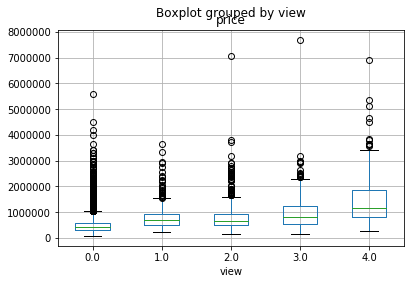

In [17]:
data.boxplot(column = 'price', by = 'view')

In [18]:
data.groupby(['view'])['price'].describe()

count          mean            std       min       25%        50%  \
view                                                                        
0.0   19422.0  4.968061e+05  287419.959567   78000.0  311525.0   432500.0   
1.0     330.0  8.133733e+05  512776.626107  217000.0  498250.0   691944.0   
2.0     957.0  7.913904e+05  510385.693444  169317.0  485000.0   675000.0   
3.0     508.0  9.732852e+05  613898.399842  154000.0  558000.0   802500.0   
4.0     317.0  1.452466e+06  930747.701932  252000.0  815000.0  1180000.0   

            75%        max  
view                        
0.0    600000.0  5570000.0  
1.0    923750.0  3650000.0  
2.0    938000.0  7060000.0  
3.0   1260000.0  7700000.0  
4.0   1850000.0  6890000.0

In [19]:
data[data['view'].isnull()]

id       date      price  bedrooms  bathrooms  sqft_living  \
7      2008000270 2015-01-15   291850.0         3       1.50         1060   
114    8961960160 2014-10-28   480000.0         4       2.50         3230   
129    7853210060 2015-04-06   430000.0         4       2.50         2070   
205    3456000310 2014-08-04   840000.0         4       1.75         2480   
487    1895000260 2014-07-21   207950.0         2       2.00          890   
...           ...        ...        ...       ...        ...          ...   
19989   148000475 2014-05-28  1400000.0         4       3.25         4700   
20148   291310170 2014-08-04   384500.0         3       2.50         1600   
20380  1196003740 2014-09-24   734000.0         5       4.25         4110   
21057  3448900290 2014-08-28   636230.0         4       2.50         2840   
21589  3448900210 2014-10-14   610685.0         4       2.50         2520   

       sqft_lot  floors  view  condition  grade  sqft_above sqft_basement  \
7          9711     1.0   NaN          3      7        1060           0.0   
114       16171     2.0   NaN          3      9        2520         710.0   
129        4310     2.0   NaN          3      7        2070           0.0   
205       11010     1.0   NaN          4      9        1630         850.0   
487        5000     1.0   NaN          3      6         890           0.0   
...         ...     ...   ...        ...    ...         ...           ...   
19989      9160     1.0   NaN          3     11        2520        2180.0   
20148      2610     2.0   NaN          3      8        1600           0.0   
20380     42755     2.0   NaN          3     10        2970        1140.0   
21057      6284     2.0   NaN          3      9        2840           0.0   
21589      6023     2.0   NaN          3      9        2520           0.0   

       yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
7          1963           0.0    98198  47.4095 -122.315           1650   
114        2001           0.0    98001  47.3183 -122.253           2640   
129        2004           0.0    98065  47.5319 -121.850           1970   
205        1966           NaN    98040  47.5378 -122.219           2770   
487        1917           0.0    98118  47.5158 -122.264           1860   
...         ...           ...      ...      ...      ...            ...   
19989      2005           0.0    98116  47.5744 -122.406           2240   
20148      2005           NaN    98027  47.5344 -122.068           1445   
20380      2000           NaN    98023  47.3375 -122.337           2730   
21057      2013           0.0    98056  47.5135 -122.169           2790   
21589      2014           0.0    98056  47.5137 -122.167           2520   

       sqft_lot15  
7            9711  
114          8517  
129          3748  
205         10744  
487          5000  
...           ...  
19989        8700  
20148        1288  
20380       12750  
21057        7168  
21589        6023  

[63 rows x 20 columns]

Based on quick preliminary statistics, it is possible that the 'view' variable will play a relevant role. 

We do not want to drop the entire column or the rows where the value is missing. 

Instead, we are populating the NaN values with the median of the column, which is 0. 

In [20]:
data['view'] = data['view'].fillna(data['view'].median());
data['view'].value_counts(dropna=False)

0.0    19485
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

### 'condition', 'grade'

In [21]:
data['condition'].value_counts(dropna = False)

3    14020
4     5677
5     1701
2      170
1       29
Name: condition, dtype: int64

In [22]:
data['grade'].value_counts(dropna = False)

7     8974
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64

In [23]:
# filtering to low conditions / grades

data[(data['condition'] < 2) | (data['grade'] < 5)]
# data[(data['condition'] < 2)]

id       date      price  bedrooms  bathrooms  sqft_living  \
36     9435300030 2014-05-28   550000.0         4       1.00         1660   
350    7325600160 2014-06-04   299000.0         1       0.75          560   
380    1726059053 2014-09-16   270000.0         2       1.50         1380   
397    5175800060 2014-06-23   365000.0         4       2.00         1940   
465    8658300340 2014-05-23    80000.0         1       0.75          430   
1065   3340401535 2014-11-05   140000.0         1       1.00          730   
1440   5694000710 2014-11-07   352950.0         3       1.00         1760   
1732    913000340 2015-01-02   252000.0         1       1.00          680   
2221   3886902445 2015-03-16   535000.0         2       1.00          920   
3002   9187200245 2014-12-31   441000.0         4       1.50         1100   
3199    723049596 2014-05-09   255000.0         2       1.00          810   
3220   2420069251 2015-02-25   262000.0         1       0.75          520   
3578   1925069006 2014-12-03   355000.0         1       0.75          530   
3881   5279100625 2015-04-29   248000.0         2       1.00          770   
3971   6324000090 2015-05-11   210000.0         2       1.00          990   
4647    859000110 2014-10-02   125000.0         1       1.00          500   
5199   4048400185 2014-10-22   352000.0         2       0.75          760   
6474   7203601405 2015-04-14   217000.0         2       1.00          730   
7369   9275200080 2014-11-07   295000.0         3       1.50          720   
7629   4008400515 2015-01-20   190000.0         1       0.75          780   
7966   3122069029 2014-06-19   120000.0         2       1.00          990   
8588   6730700385 2014-10-22   205000.0         3       0.75          770   
8610   1823069059 2014-06-11   355000.0         1       1.75          750   
8614   6303400395 2015-01-30   325000.0         1       0.75          410   
9632   4391600065 2014-08-14   330000.0         2       0.75          520   
9784   3760500240 2015-05-12   435000.0         2       0.75          750   
11488  4322200105 2015-03-31   229050.0         1       1.00          420   
11576  6453300055 2014-10-07   188000.0         1       1.00          550   
12063  8655900162 2015-02-19   156000.0         1       0.75          470   
12294  2570600140 2015-01-28   196000.0         3       2.25         1510   
12441  4022900951 2015-04-02   305000.0         2       1.00          910   
12655  4006000281 2014-07-29   227000.0         3       1.75         2380   
13615  2023049218 2014-07-16   105500.0         2       1.00          930   
13616  2023049218 2015-03-16   445000.0         2       1.00          930   
13988  2354300456 2015-03-11   130000.0         2       1.00          600   
14078  1822059057 2014-07-25   152000.0         2       1.00          700   
14567  6929602721 2015-04-08    95000.0         2       1.00          960   
14973  9187200095 2014-12-02   432500.0         6       2.00         3080   
15026  3623059027 2014-10-22   200000.0         2       0.75          780   
15279    40000362 2014-05-06    78000.0         2       1.00          780   
15323  7849200635 2014-06-30   235000.0         2       1.00          900   
15357  7936500221 2015-01-14   658000.0         2       1.00         1010   
15698  3089000005 2014-07-24   150000.0         2       1.00          850   
16184  3028200080 2015-03-24    81000.0         2       1.00          730   
16326  6146600170 2014-07-03   100000.0         2       0.75          660   
16516  2114700500 2015-04-18    90000.0         1       1.00          560   
16879  3501100050 2014-12-10   125000.0         3       1.00         1230   
16928  5015001680 2014-06-11   427000.0         4       1.00         1860   
17380   745000005 2014-08-25   145000.0         1       0.75          480   
17791  2206900065 2015-05-01   380000.0         3       1.50         1430   
18038  1352300580 2014-11-14   247000.0         1       1.00          460   
18152  3664

'condition' and 'grade' variables look OK at a glance. However, they can be considered to be outliers, we will exclude the rows with low condition or grade values from our analysis. 

### 'yr_built'

In [24]:
data['yr_built'].value_counts().head()

2014    559
2006    453
2005    450
2004    433
2003    420
Name: yr_built, dtype: int64

In [25]:
data['yr_built'].value_counts().tail()

1933    30
1901    29
1902    27
1935    24
1934    21
Name: yr_built, dtype: int64

In [26]:
data['yr_built'].describe()

count    21597.000000
mean      1970.999676
std         29.375234
min       1900.000000
25%       1951.000000
50%       1975.000000
75%       1997.000000
max       2015.000000
Name: yr_built, dtype: float64

In [27]:
# minimum is 1900, makes me wonder if that's just a default input

data[data['yr_built'] == 1900]

id       date     price  bedrooms  bathrooms  sqft_living  \
14     1175000570 2015-03-12  530000.0         5       2.00         1810   
115    3626039325 2014-11-21  740500.0         3       3.50         4380   
498    9274202270 2014-08-18  625000.0         2       1.50         1490   
537    5694500105 2014-12-04  595000.0         2       2.00         1510   
703    7011200260 2014-12-19  485000.0         4       2.00         1400   
...           ...        ...       ...       ...        ...          ...   
19048  1702901340 2014-06-13  718500.0         3       2.00         2910   
19122  3388110230 2014-07-29  179000.0         4       1.75         1790   
19304  4083302225 2014-10-14  850000.0         4       3.00         2550   
19370  2420069042 2015-04-24  240000.0         3       2.00         1553   
19582  7518507685 2015-02-23  400000.0         3       1.00         1100   

       sqft_lot  floors  view  condition  grade  sqft_above sqft_basement  \
14         4850     1.5   0.0          3      7        1810           0.0   
115        6350     2.0   0.0          3      8        2780             ?   
498        5750     1.5   0.0          4      7        1190         300.0   
537        4000     1.0   0.0          4      7        1010         500.0   
703        3600     1.0   0.0          3      7        1100         300.0   
...         ...     ...   ...        ...    ...         ...           ...   
19048      6600     2.0   0.0          4      7        1920         990.0   
19122      7175     1.5   0.0          3      6        1410         380.0   
19304      3784     1.5   0.0          4      8        1750         800.0   
19370      6550     1.0   0.0          3      7        1553           0.0   
19582      5100     2.0   0.0          4      7        1100           0.0   

       yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
14         1900           0.0    98107  47.6700 -122.394           1360   
115        1900           NaN    98117  47.6981 -122.368           1830   
498        1900           0.0    98116  47.5872 -122.390           1590   
537        1900           0.0    98103  47.6582 -122.345           1920   
703        1900           0.0    98119  47.6385 -122.370           1630   
...         ...           ...      ...      ...      ...            ...   
19048      1900           NaN    98118  47.5576 -122.281           1370   
19122      1900           NaN    98168  47.4963 -122.318           1790   
19304      1900           0.0    98103  47.6559 -122.338           2100   
19370      1900           NaN    98022  47.2056 -121.994           1010   
19582      1900           0.0    98117  47.6790 -122.386           1540   

       sqft_lot15  
14           4850  
115          6350  
498          4025  
537          4000  
703          2048  
...           ...  
19048        5500  
19122        8417  
19304        4560  
19370       10546  
19582        5100  

[87 rows x 20 columns]

In [28]:
data[data['yr_built'] < 1905]['yr_built'].value_counts()

1900    87
1903    46
1904    45
1901    29
1902    27
Name: yr_built, dtype: int64

The amount of 1900 entries is a bit suspicios, it is possible that the values before 1900 are coded as 1900, or it is simply the default value. In any case, not much else we can do with the data, leaving it as it is. 

### 'yr_renovated'

In [29]:
data['yr_renovated'].value_counts(dropna = False).head()

0.0       17011
NaN        3842
2014.0       73
2003.0       31
2013.0       31
Name: yr_renovated, dtype: int64

Similar treatment to 'waterfront' variable, huge majority of the variable is either 0 or NaN, we can't use it in the linear regression, dropping it from the data. 

In [30]:
data.drop(labels = 'yr_renovated', axis = 1, inplace = True);

### 'sqft_living'

In [31]:
data['sqft_living'].describe()

count    21597.000000
mean      2080.321850
std        918.106125
min        370.000000
25%       1430.000000
50%       1910.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: float64

The sizes are realistic, distribution certainly skewed to the right size. Analysing right tail next. 

In [32]:
# checking tail of distrivution
# including a function for this purpose, will need it for the other sqft variables, and potentially price

def analyse_right_tail(variable_name, percentile):
    
    """Takes percentile of variable name, displays histograms, top table, logarithmic scale histograms"""
    
    plt.figure(figsize = (5,5))
    plt.hist(x = data[variable_name], bins = 100)
    plt.title(variable_name + ' histogram')
    plt.show()
    
    # create a new database of top <perc> quantile of the distribution
    top_perc = data[data[variable_name] > data[variable_name].quantile(percentile)]
    
    # histogram of right tail
    plt.figure(figsize = (5,5))
    plt.hist(x = top_perc[variable_name], bins = 100)
    plt.title(variable_name + ' top ' + str(round((1-percentile) * 100,2)) + ' percentile histogram')
    plt.show()    
    
    # check data for top values
    print(top_perc.sort_values(by = [variable_name], ascending = False).head(20))
    
    # see if logarithmic scale results in better-looking histograms
    plt.figure(figsize = (5,5))
    plt.hist(x = np.log(top_perc[variable_name]), bins = 100)
    plt.title(variable_name + ' logarithmic scale top ' + str(round((1-percentile) * 100,2)) + ' percentile histogram')
    plt.show()    
    
    plt.figure(figsize = (5,5))
    plt.hist(x = np.log(data[variable_name]), bins = 100)
    plt.title(variable_name + ' logarithmic scale histogram')
    plt.show()
    

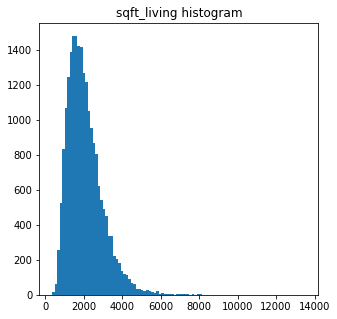

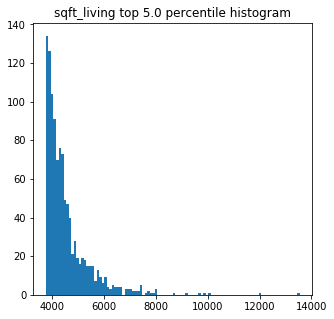

               id       date      price  bedrooms  bathrooms  sqft_living  \
12764  1225069038 2014-05-05  2280000.0         7       8.00        13540   
7245   6762700020 2014-10-13  7700000.0         6       8.00        12050   
3910   9808700762 2014-06-11  7060000.0         5       4.50        10040   
9245   9208900037 2014-09-19  6890000.0         6       7.75         9890   
8085   1924059029 2014-06-17  4670000.0         5       6.75         9640   
4407   2470100110 2014-08-04  5570000.0         5       5.75         9200   
14542  2303900035 2014-06-11  2890000.0         5       6.25         8670   
18288  6072800246 2014-07-02  3300000.0         5       6.25         8020   
1162   1247600105 2014-10-20  5110000.0         5       5.25         8010   
1446   8907500070 2015-04-13  5350000.0         5       5.00         8000   
13398  2426039123 2015-01-30  2420000.0         5       4.75         7880   
19842  2524069078 2015-01-22  2700000.0         4       4.00         7850   

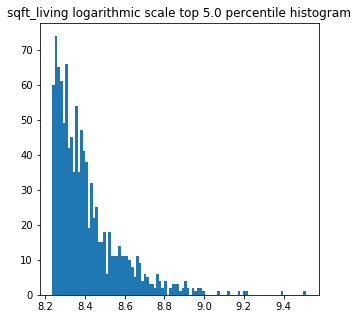

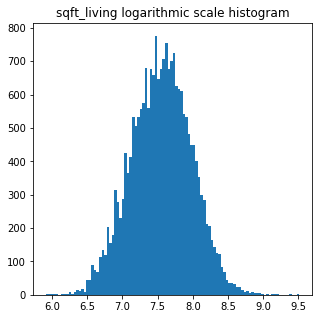

In [33]:
analyse_right_tail('sqft_living', 0.95)

Values are sensible, high values are in the believable scope, but we should use a logarithmic scale in the regression. 

### 'sqft_lot'

In [34]:
data['sqft_lot'].apply(lambda x: x/1000).describe()

count    21597.000000
mean        15.099409
std         41.412637
min          0.520000
25%          5.040000
50%          7.618000
75%         10.685000
max       1651.359000
Name: sqft_lot, dtype: float64

Once again, looks very skewed to the right, we are doing the same analysis as for the previous sqft variable.

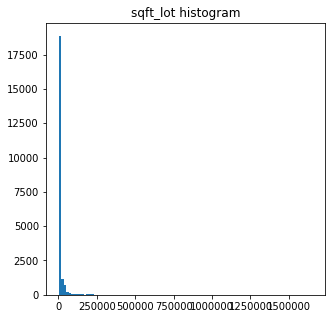

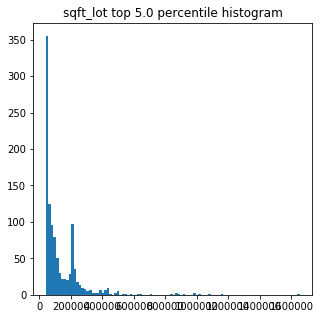

               id       date      price  bedrooms  bathrooms  sqft_living  \
1717   1020069017 2015-03-27   700000.0         4       1.00         1300   
17305  3326079016 2015-05-04   190000.0         2       1.00          710   
7640   2623069031 2014-05-21   542500.0         5       3.25         3010   
7762   2323089009 2015-01-19   855000.0         4       3.50         4030   
3945    722069232 2014-09-05   998000.0         4       3.25         3770   
4437   3626079040 2014-07-30   790000.0         2       3.00         2560   
6685   2624089007 2015-03-20  2000000.0         2       2.50         3900   
7070   2724079090 2015-01-05  1650000.0         4       3.25         3920   
20436  1125079111 2015-04-15  1600000.0         4       5.50         6530   
9705    225079036 2015-01-07   937500.0         4       4.00         5545   
4536   2522029039 2014-09-29   550000.0         3       2.00         3650   
12993   619079096 2015-04-06   750000.0         3       2.50         2350   

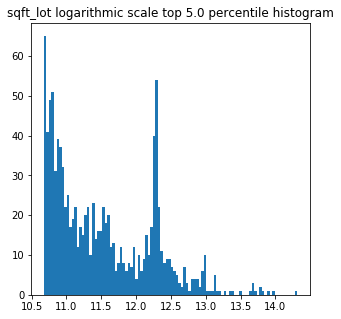

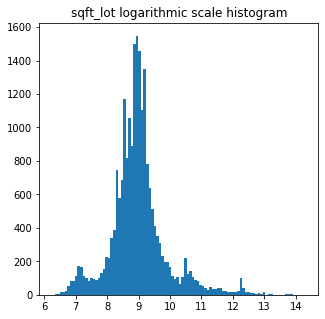

In [35]:
analyse_right_tail('sqft_lot', 0.95)

There are extremely high values here.Once again, I don't believe the data itself is wrong, searching for the properties with top lot sizes, overall it seems believable. However, there is something suspicious going on with this variable, the shape of the histogram is highly irregular with multiple peaks. 

If we opt to use this variable, I recommend cutting the top x% from the regression analysis. 

### 'sqft_above'

In [36]:
data['sqft_above'].describe()

count    21597.000000
mean      1788.596842
std        827.759761
min        370.000000
25%       1190.000000
50%       1560.000000
75%       2210.000000
max       9410.000000
Name: sqft_above, dtype: float64

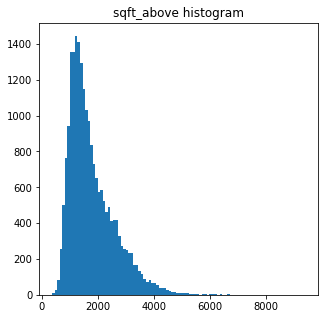

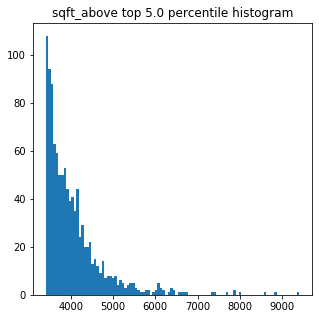

               id       date      price  bedrooms  bathrooms  sqft_living  \
12764  1225069038 2014-05-05  2280000.0         7       8.00        13540   
9245   9208900037 2014-09-19  6890000.0         6       7.75         9890   
7245   6762700020 2014-10-13  7700000.0         6       8.00        12050   
18288  6072800246 2014-07-02  3300000.0         5       6.25         8020   
13398  2426039123 2015-01-30  2420000.0         5       4.75         7880   
19842  2524069078 2015-01-22  2700000.0         4       4.00         7850   
3910   9808700762 2014-06-11  7060000.0         5       4.50        10040   
11859  8835800350 2015-01-12  1950000.0         4       3.25         7420   
18579  3023069166 2014-07-08  1140000.0         5       4.00         7320   
1446   8907500070 2015-04-13  5350000.0         5       5.00         8000   
16759  1630700380 2015-01-30  1920000.0         5       5.75         7730   
11093  4054530260 2014-06-27  1820000.0         4       4.50         6640   

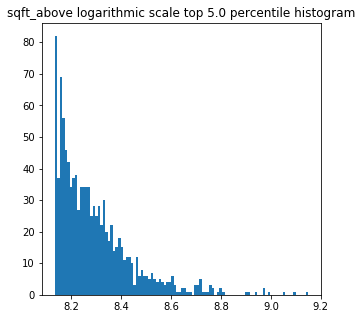

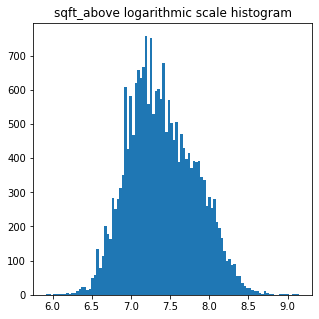

In [37]:
# the above looks good at a first glance, running usual analysis
analyse_right_tail('sqft_above', 0.95)

Similar treatment as with sqft_living, I believe the data is correct, use logarithmic scale. 

### 'sqft_basement'


TODO replace ? with 0, make everything float

In [38]:
data['sqft_basement'].describe()

count     21597
unique      304
top         0.0
freq      12826
Name: sqft_basement, dtype: object

In [39]:
# There are non-numeric values in this column, a quick search through the data revealed that there are '?' values. 
data['sqft_basement'].value_counts(dropna=False).head()

0.0      12826
?          454
600.0      217
500.0      209
700.0      208
Name: sqft_basement, dtype: int64

In [40]:
type(data['sqft_basement'][0])

str

In [41]:
# they are strings and there are some '?' values
# first, replace '?' with 0
data['sqft_basement'].replace('?', 0, inplace = True)


In [42]:
data['sqft_basement'].value_counts().head()

0.0      12826
0          454
600.0      217
500.0      209
700.0      208
Name: sqft_basement, dtype: int64

In [43]:
# next, we make them floats first then to integers
data['sqft_basement'] = data['sqft_basement'].apply(lambda x: float(x))
data['sqft_basement'] = data['sqft_basement'].apply(lambda x: int(x))

In [44]:
data['sqft_basement'].describe()

count    21597.000000
mean       285.716581
std        439.819830
min          0.000000
25%          0.000000
50%          0.000000
75%        550.000000
max       4820.000000
Name: sqft_basement, dtype: float64

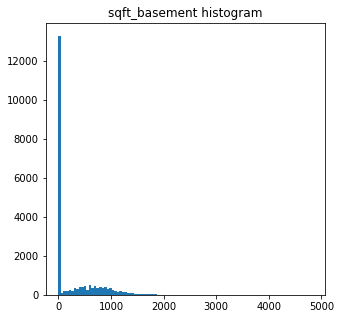

In [45]:
# log scale obviously won't work with basements, there are a lot of 0 values
# just checking the histogram now

plt.figure(figsize = (5,5))
plt.hist(x = data['sqft_basement'], bins = 100)
plt.title('sqft_basement histogram')
plt.show()

This does not look like something we should use in the data. 

### 'sqft_living15'

In [46]:
data['sqft_living15'].apply(lambda x: x/1000).describe()

count    21597.00000
mean         1.98662
std          0.68523
min          0.39900
25%          1.49000
50%          1.84000
75%          2.36000
max          6.21000
Name: sqft_living15, dtype: float64

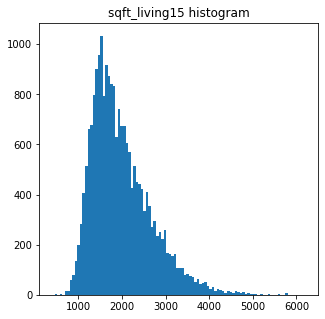

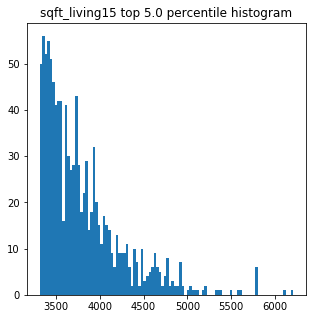

               id       date      price  bedrooms  bathrooms  sqft_living  \
19842  2524069078 2015-01-22  2700000.0         4       4.00         7850   
10362  3303850390 2014-12-12  2980000.0         5       5.50         7400   
21524   715010530 2015-01-13  1880000.0         5       3.50         4410   
20814   715010140 2014-10-02  1750000.0         5       3.25         5790   
20547   715010110 2014-08-04  1240000.0         5       3.25         5790   
16416   715010130 2015-02-02  1750000.0         6       4.25         5860   
5446   7237501190 2014-10-10  1780000.0         4       3.25         4890   
1122   7237501180 2014-06-25  1200000.0         4       1.75         3990   
11859  8835800350 2015-01-12  1950000.0         4       3.25         7420   
1528   4054510270 2014-08-27  1250000.0         4       3.75         3830   
12700   853200040 2015-04-28  2410000.0         5       2.50         4600   
2711   7851980260 2014-07-30  1110000.0         5       3.50         7350   

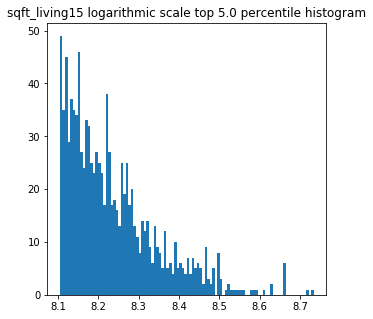

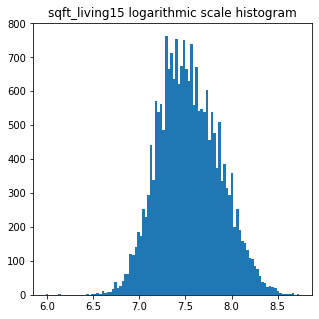

In [47]:
analyse_right_tail('sqft_living15', 0.95)

Same as other sqft, does not look wrong, use log scale in regression. 

### 'sqft_lot15'

In [48]:
data['sqft_lot15'].apply(lambda x: x/1000).describe()

count    21597.000000
mean        12.758284
std         27.274442
min          0.651000
25%          5.100000
50%          7.620000
75%         10.083000
max        871.200000
Name: sqft_lot15, dtype: float64

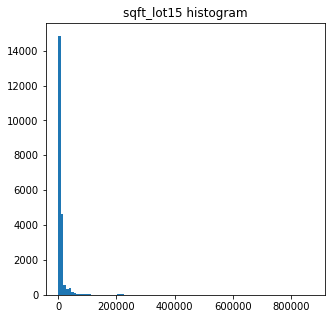

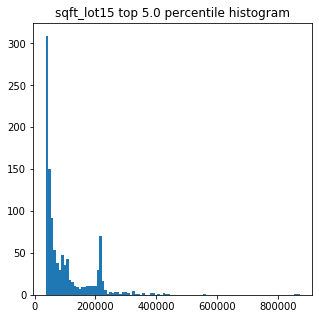

               id       date      price  bedrooms  bathrooms  sqft_living  \
9705    225079036 2015-01-07   937500.0         4       4.00         5545   
20436  1125079111 2015-04-15  1600000.0         4       5.50         6530   
13451  3420069060 2014-11-07   790000.0         3       2.50         2640   
8655   3226079059 2014-10-19   549950.0         3       1.75         2930   
3797   1550000463 2014-08-26   637000.0         4       3.50         3080   
1717   1020069017 2015-03-27   700000.0         4       1.00         1300   
19141  1020069042 2014-10-01   858000.0         4       3.50         4370   
6685   2624089007 2015-03-20  2000000.0         2       2.50         3900   
15606  2225079030 2014-12-12   180000.0         2       1.00          960   
21415  2725079018 2014-05-09   800000.0         4       3.25         3540   
17645   620079042 2015-03-23   370000.0         2       1.00         2360   
11171  1422029117 2014-07-11   319000.0         3       1.75         1640   

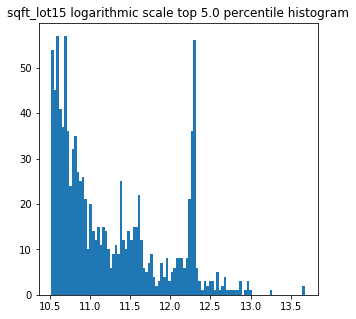

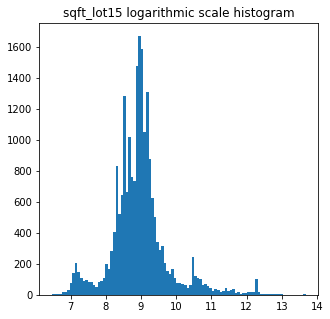

In [49]:
analyse_right_tail('sqft_lot15', 0.95)

Similar to sqft_lot, weird distribution. 

### 'bedrooms'

In [50]:
data['bedrooms'].describe()

count    21597.000000
mean         3.373200
std          0.926299
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         33.000000
Name: bedrooms, dtype: float64

In [51]:
data['bedrooms'].value_counts(dropna = False)

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [52]:
data[data['bedrooms'] == 33]

id       date     price  bedrooms  bathrooms  sqft_living  \
15856  2402100895 2014-06-25  640000.0        33       1.75         1620   

       sqft_lot  floors  view  condition  grade  sqft_above  sqft_basement  \
15856      6000     1.0   0.0          5      7        1040            580   

       yr_built  zipcode      lat     long  sqft_living15  sqft_lot15  
15856      1947    98103  47.6878 -122.331           1330        4700

In [53]:
# replacing it with 3, my guess is that it was supposed to be 3
data['bedrooms'].replace(33,3, inplace = True);

Replaced one extreme value with an educated guess. 

### 'bathrooms'

In [54]:
data['bathrooms'].value_counts()

2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
8.00       2
6.25       2
6.75       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

In [55]:
data[data['bathrooms'] > 6].describe()

id         price   bedrooms  bathrooms   sqft_living  \
count  1.000000e+01  1.000000e+01  10.000000  10.000000     10.000000   
mean   4.004522e+09  3.240000e+06   6.100000   7.025000   8687.000000   
std    3.471917e+09  2.478530e+06   1.286684   0.711512   2759.202985   
min    4.240490e+08  4.500000e+05   5.000000   6.250000   4050.000000   
25%    1.399817e+09  1.445000e+06   5.000000   6.500000   7322.500000   
50%    2.413985e+09  2.585000e+06   6.000000   6.750000   8345.000000   
75%    6.590225e+09  4.327500e+06   6.750000   7.687500   9827.500000   
max    9.208900e+09  7.700000e+06   9.000000   8.000000  13540.000000   

           sqft_lot     floors       view  condition      grade   sqft_above  \
count      10.00000  10.000000  10.000000  10.000000  10.000000    10.000000   
mean    65470.50000   2.050000   2.100000   3.100000  11.500000  6619.000000   
std     92580.10301   0.497214   1.911951   0.316228   1.779513  1950.472592   
min      6504.00000   1.000000   0.000000   3.000000   7.000000  4050.000000   
25%     15235.50000   2.000000   0.000000   3.000000  11.000000  4900.000000   
50%     29487.00000   2.000000   2.500000   3.000000  12.000000  6270.000000   
75%     58440.75000   2.000000   4.000000   3.000000  12.750000  8432.500000   
max    307752.00000   3.000000   4.000000   4.000000  13.000000  9410.000000   

       sqft_basement     yr_built       zipcode        lat        long  \
count      10.000000    10.000000     10.000000  10.000000   10.000000   
mean     2068.000000  1982.500000  98082.900000  47.597020 -122.201000   
std      1689.699513    31.496913     61.120009   0.073348    0.150625   
min         0.000000  1910.000000  98006.000000  47.464300 -122.372000   
25%       895.000000  1969.500000  98039.250000  47.559625 -122.317500   
50%      1910.000000  1997.500000  98064.000000  47.593500 -122.225000   
75%      3247.500000  2001.000000  98133.500000  47.630325 -122.076500   
max      4820.000000  2010.000000  98177.000000  47.729500 -121.982000   

       sqft_living15     sqft_lot15  
count      10.000000      10.000000  
mean     3366.800000   47427.000000  
std      1155.627852   64264.711056  
min      1448.000000    3866.000000  
25%      2735.000000   10978.000000  
50%      3605.000000   26079.500000  
75%      4155.000000   44350.000000  
max      4850.000000  217800.000000

'bathrooms' looks OK. 

### 'floors'

In [56]:
data['floors'].value_counts()

1.0    10673
2.0     8235
1.5     1910
3.0      611
2.5      161
3.5        7
Name: floors, dtype: int64

Once again, floors look believable.

### 'price'

In [57]:
data['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

Really skewed to the right. Let's analyse right tail. 

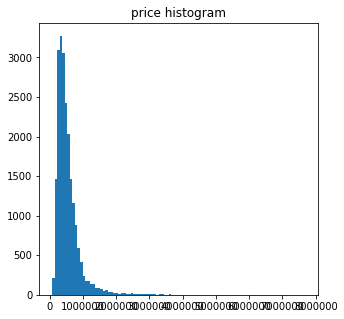

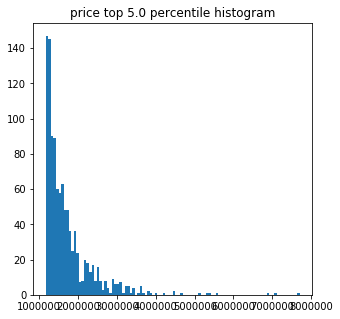

               id       date      price  bedrooms  bathrooms  sqft_living  \
7245   6762700020 2014-10-13  7700000.0         6       8.00        12050   
3910   9808700762 2014-06-11  7060000.0         5       4.50        10040   
9245   9208900037 2014-09-19  6890000.0         6       7.75         9890   
4407   2470100110 2014-08-04  5570000.0         5       5.75         9200   
1446   8907500070 2015-04-13  5350000.0         5       5.00         8000   
1313   7558700030 2015-04-13  5300000.0         6       6.00         7390   
1162   1247600105 2014-10-20  5110000.0         5       5.25         8010   
8085   1924059029 2014-06-17  4670000.0         5       6.75         9640   
2624   7738500731 2014-08-15  4500000.0         5       5.50         6640   
8629   3835500195 2014-06-18  4490000.0         4       3.00         6430   
12358  6065300370 2015-05-06  4210000.0         5       6.00         7440   
4145   6447300265 2014-10-14  4000000.0         4       5.50         7080   

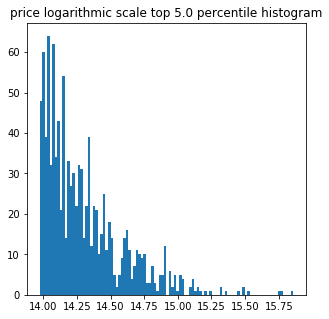

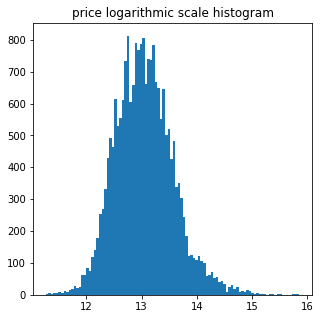

In [58]:
analyse_right_tail('price', 0.95)

I believe we should drop top x% from the regression analysis. 

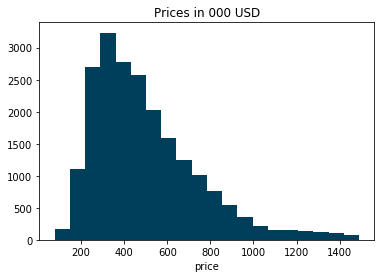

In [59]:
plt.hist(x = data[data['price'] < 1500000]['price']/1000, bins =20, color = '#003f5c')
plt.title('Prices in 000 USD')
plt.xlabel('price')
plt.show()

In [163]:
data['price_000'] = data['price']/1000
print(data['price_000'].describe())
print(data['price_000'].quantile(0.05))
print(data['price_000'].quantile(0.10))
print(data['price_000'].quantile(0.90))
print(data['price_000'].quantile(0.95))

count    21597.000000
mean       540.296574
std        367.368140
min         78.000000
25%        322.000000
50%        450.000000
75%        645.000000
max       7700.000000
Name: price_000, dtype: float64
210.0
245.0
887.0
1160.0


In [60]:
for i in range(0,10):
    print(str((1-i/100) * 100) + '% percentile of price variable: ' + str(data['price'].quantile(1-i/100)))

100.0% percentile of price variable: 7700000.0
99.0% percentile of price variable: 1970000.0
98.0% percentile of price variable: 1600000.0
97.0% percentile of price variable: 1390000.0
96.0% percentile of price variable: 1260000.0
95.0% percentile of price variable: 1160000.0
94.0% percentile of price variable: 1060000.0
93.0% percentile of price variable: 997964.0000000002
92.0% percentile of price variable: 950000.0
91.0% percentile of price variable: 919993.6


We will drop the top 1% of prices. 

### Summary: 
  
id: 177 properties are in the database multiple times, 353 rows are impacted in total. I think we can leave these rows untouched in the data. 
  
date: re-coded to datetime, no additional edits
  
lat: no edits
  
long: no edits
  
zipcode: no edits
  
waterfront: column deleted
  
view: NaN's populated with the median of the column

condition: looks correct, but filter out condition 1's

grade: looks correct, but filter out grade 1 to 4's

yr_built: there are a couple 1900 values that could be erroneous, but we are making no edits

yr_renovated: same treatment as waterfront, deleted from the data

sqft_living: data is OK, in regression analysis, use logarithmic

sqft_lot: data is OK, in regression analysis, use logarithmic, and filter out the highest values, the data is extremely skewed even after log scale, distribution looks a bit suspicious, unexplained peaks in distribution.

sqft_above: same as sqft_living, data OK, use log scale

sqft_basement: looks like a bad variable to use in the regression

sqft_living15: same as living and above, OK, use log scale

sqft_lot15: same as sqft_lot

bedrooms: one extreme value, 33, replaced it with 3

bathrooms: OK

floors: OK

## Section 2 - Data Exploration

In this section, we are exploring questions about the data. We realize that there are a lot more that could be investigated. 

### Question 1: 
_If we split the data into two subgroups of equal sizes based on the yr_built variable, can we see a different pattern in the price?_

First, we check a scatter plot. 

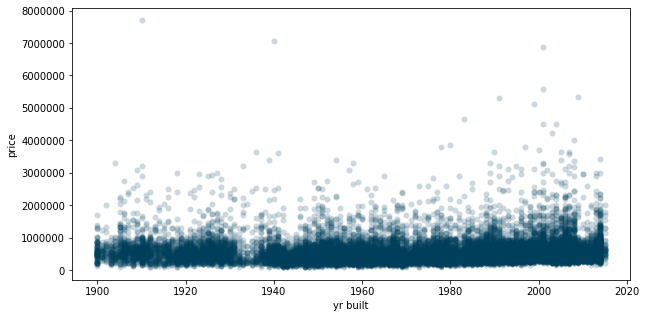

In [61]:
plt.figure(figsize=(10,5))
plt.scatter(data['yr_built'], data['price'], alpha = 0.2, color = '#003f5c', linewidth = 0)
plt.xlabel('yr built')
plt.ylabel('price')
plt.show()

It is hard to tell simply based on scatter plot, the areas with most of the values are crammed, checking same quesiton for prices under 1m now. 

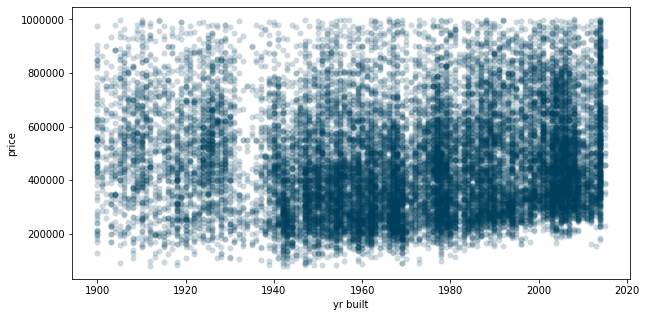

In [62]:
plt.figure(figsize=(10,5))
plt.scatter(
    data[data['price'] < 1000000]['yr_built'], 
    data[data['price'] < 1000000]['price'], alpha = 0.2, color = '#003f5c', linewidth = 0)
plt.xlabel('yr built')
plt.ylabel('price')
plt.show()

Apart from the observation that they did not build that many houses in certain time periods, like between 1930 and 1940, there seems to be a slight increase in the minimum price. 

Next, we are creating a new variable based on median built year. 

In [63]:
yr_built_median = int(data['yr_built'].median())
yr_built_median

1975

In [64]:
data['built_after_1975'] = data['yr_built'] >= 1975

# it will be True for houses built IN 1975 too
# from here on, after 1975 = 1975 or later, before 1975: 1974 or earlier

In [65]:
def hist_of_dummy_variable(bool_var_name, group_true_label, group_false_label):

    """
    Shows two histograms and their kdes for price in the database, for any boolean variable. 
    
    """

    bin_number = 100

    data_hist_filtered = data[data['price'] < 2000000]

    plt.hist(data_hist_filtered[data_hist_filtered[bool_var_name]==False]['price']/1000, 
             bins=bin_number, alpha=0.5, label=group_false_label, 
             color = "#003f5c", density = True)
    plt.hist(data_hist_filtered[data_hist_filtered[bool_var_name]==True]['price']/1000, 
             bins=bin_number, alpha=0.5, label=group_true_label,  
             color = "#bc5090", density = True)
    plt.xlabel('price in 000 USD')
    plt.legend(loc='upper right')
    sns.kdeplot(data_hist_filtered[data_hist_filtered[bool_var_name]==False]['price']/1000, 
                color = "#003f5c", legend = False)
    sns.kdeplot(data_hist_filtered[data_hist_filtered[bool_var_name]==True]['price']/1000, 
                color = "#bc5090", legend = False)
    plt.show()

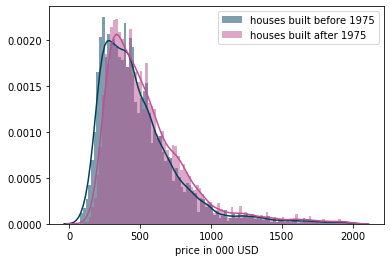

In [66]:
hist_of_dummy_variable('built_after_1975', 'houses built after 1975', 'houses built before 1975')

Based on the histogram, the two distributions are of a very similar shape, but it's slightly shifted to the right for houses built after 1975. 

In [67]:
data.groupby('built_after_1975')['price'].describe()

count           mean            std       min       25%  \
built_after_1975                                                              
False             10739.0  506206.424248  344961.001766   78000.0  295000.0   
True              10858.0  574013.106281  385320.224925  100000.0  345000.0   

                       50%       75%        max  
built_after_1975                                 
False             425000.0  605002.0  7700000.0  
True              479995.0  677975.0  6890000.0

__Question 1 Answer__: <br> Yes, if we split the data into two subsections based on whether the houses were built before or after 1975, we see a difference in the distribution of price. In general, the houses built after 1975 cost more, by about 70k. The distribution of the houses is similar, mean price is 505k for houses built before 1975, 575k for the ones built after. Standard deviation is larger for the houses built after 1975. Both distributions have a fat right tail. 

### Question 2: 
_Similar question to question 1, do we see a pattern of price regarding the date variable? Does it look like prices are significantly increasing during the one year the data is from?_

Similar approach as in question 1, we check a scatter plot. 

Important note: we are not taking a time series analysis approach here, simply see if there is any pattern to the dates and prices. 

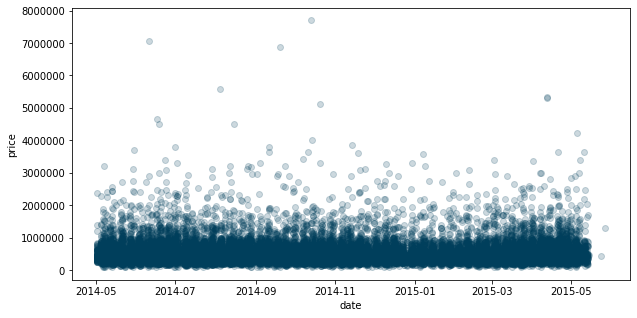

In [68]:
plt.figure(figsize=(10,5))
plt.plot_date(data['date'], data['price'], alpha = 0.2, color = '#003f5c', linewidth = 0)
plt.xlabel('date')
plt.ylabel('price')
plt.show()

Once again, no apparentstructure, trying to zoom in on prices under 1m. 

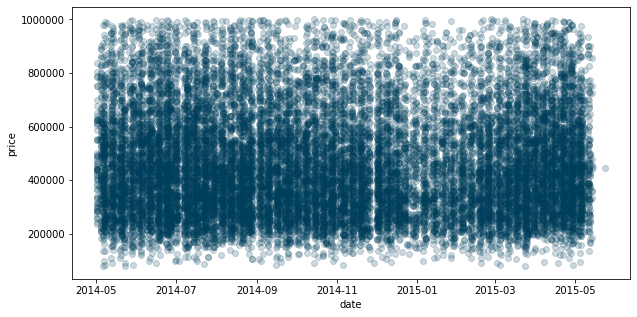

In [69]:
plt.figure(figsize=(10,5))
plt.plot_date(data[data['price']<1000000]['date'], 
              data[data['price']<1000000]['price'], 
              alpha = 0.2, color = '#003f5c', linewidth = 0)
plt.xlabel('date')
plt.ylabel('price')
plt.show()

In the next step, we are splitting the database based on the dates, into two subgroup: the transaction happened after, or before the half of the time period. 

It is important to note that we are taking the half point between the min and max of the dates, not the mean or median of the population. 

In [70]:
date_midpoint = (data['date'].max() - data['date'].min()) / 2 + data['date'].min()
date_midpoint

Timestamp('2014-11-13 00:00:00')

In [71]:
data['sold_in_2nd_half'] = data['date'] > date_midpoint

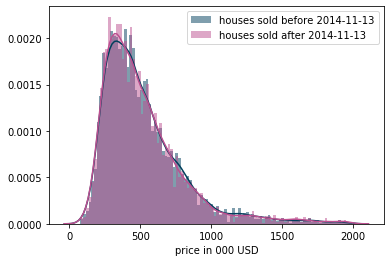

In [72]:
hist_of_dummy_variable('sold_in_2nd_half', 'houses sold after 2014-11-13', 'houses sold before 2014-11-13')

In [73]:
data_grouped = data.groupby('sold_in_2nd_half')['price'].describe()
data_grouped

count           mean            std      min       25%  \
sold_in_2nd_half                                                             
False             12444.0  541400.410720  369688.130157  78000.0  324487.5   
True               9153.0  538795.846935  364205.069568  81000.0  320000.0   

                       50%       75%        max  
sold_in_2nd_half                                 
False             452000.0  649950.0  7700000.0  
True              450000.0  639000.0  5350000.0

In [74]:
print('Increase from first to second half: ')
for column in data_grouped.columns:
    print(column + ':' + str(round((((
        data_grouped[column][1] / data_grouped[column][0]
        )-1)* 100),2)) + '%')

Increase from first to second half: 
count:-26.45%
mean:-0.48%
std:-1.48%
min:3.85%
25%:-1.38%
50%:-0.44%
75%:-1.68%
max:-30.52%


Solely based on this data, it seems like the housing market is shrinking. The amount of houses sold in the second half of the year has decreased by 26.5%. Mean, 25th, 50, and 75th percentile have all decreased by 0.5% - 1.5%. Standard deviation is also lower in the second half. 
<br>
<br>
However, all this can be due to seasonality, our data is from a one year time period, and we should be careful when drawing conclusions regarding the time patterns. 
<br>
<br>
Going to analyze the amount of houses sold by month next. 

In [75]:
data.date.describe()

count                   21597
unique                    372
top       2014-06-23 00:00:00
freq                      142
first     2014-05-02 00:00:00
last      2015-05-27 00:00:00
Name: date, dtype: object

In [76]:
# creating a function to handle one-digit months

def create_two_digits_month(month):
    """
    Returns the two digits month in a string. 
    Example: 
    >>> create_two_digits_month(3)
    >>> 03 
    which is a string
    """
    if month < 10:
        month_string = '0' + str(month)
    else: 
        month_string = str(month)
        
    return month_string
    
create_two_digits_month(5)

'05'

In [77]:
create_two_digits_month(data['date'][0].month)

'10'

In [78]:
# creating a new column with the year and month

def create_year_month_string(row):
    result_string = str(row['date'].year) + ' - ' + create_two_digits_month(row['date'].month)
    return result_string

data['year_month'] = data.apply(lambda row: create_year_month_string(row), axis = 1)

In [79]:
data.groupby(data['year_month'])['year_month'].count()

year_month
2014 - 05    1768
2014 - 06    2178
2014 - 07    2211
2014 - 08    1939
2014 - 09    1771
2014 - 10    1876
2014 - 11    1409
2014 - 12    1470
2015 - 01     978
2015 - 02    1247
2015 - 03    1875
2015 - 04    2229
2015 - 05     646
Name: year_month, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

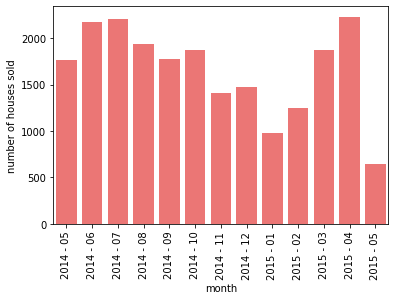

In [80]:
x_label = data.groupby(data['year_month'])['year_month'].first()
height_values = data.groupby(data['year_month'])['year_month'].count()

sns.barplot(
    x = x_label,
    y = height_values, 
    color = '#ff6361'
    )

plt.xlabel('month')
plt.ylabel('number of houses sold')

plt.xticks(rotation=90)

The number of houses sold seems to follow a seasonal trend. 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

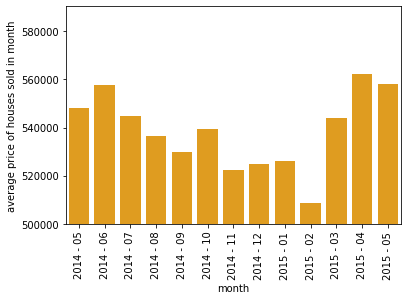

In [81]:
x_label = data.groupby(data['year_month'])['year_month'].first()
height_values = data.groupby(data['year_month'])['price'].mean()

sns.barplot(
    x = x_label,
    y = height_values, 
    color = '#ffa600'
    )

plt.xlabel('month')
plt.ylim(500000)
plt.ylabel('average price of houses sold in month')

plt.xticks(rotation=90)

The trend for the average price is less clear, but it oscillates between about 560k and 510k. It is important to note that the y label is set to a 500k limit above, to zoom in on the differences.

__Question 2 Answer:__
<br>
<br>
Based on the one year worth of information collected in the data, there is a clear seasonality when it comes to the amount of houses sold. There is a steady decrease from 2014 June to 2015 January, when the amount of houses sold start increasing again. There seems to be a sudden drop in 2015 May, although we should note that the data is not complete, the last observation is from 2015 May 27. 
<br>
<br>
The average prices among houses sold in certain months also shows variance, although the trend is somewhat less clear than with amount of houses sold. In general, houses sold between September and February seem to have a lower average price than the ones sold between March and August. 
<br>
<br>
I think we should be careful when drawing conclusions, considering that we only have the data from one year, I don't think we should use this variable in the regression model. 

### Question 3:  
_Similar question to questions 1 and 2, do we see a pattern of price regarding the zip code?_

Let's see what a scatter plot shows, although with the zip codes, they don't necessarily have a logical integer interpretation. (As in, zip codes that are represented by neighboring integers are not necessarily neighbors, the distance is not represeted in the numbers' difference, etc.) So this is mostly out of curiousity. 

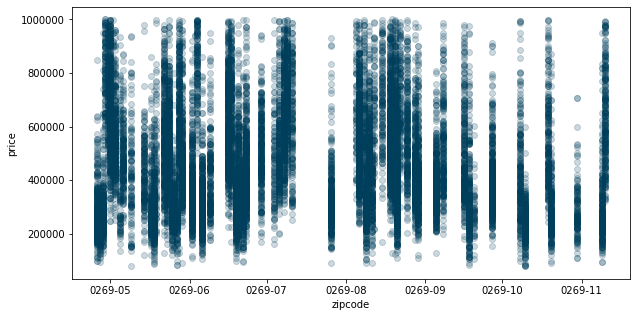

In [82]:
plt.figure(figsize=(10,5))
plt.plot_date(data[data['price']<1000000]['zipcode'], 
              data[data['price']<1000000]['price'], 
              alpha = 0.2, color = '#003f5c', linewidth = 0)
plt.xlabel('zipcode')
plt.ylabel('price')
plt.show()

As I suspected, can't really read zipcodes like that. Creating a new dummy variable, zipcodes that start with 981 are Seattle Main, the ones starting with 980 are Seattle Vicinity. 

In [83]:
data['seattle_main'] = data['zipcode'] > 98099

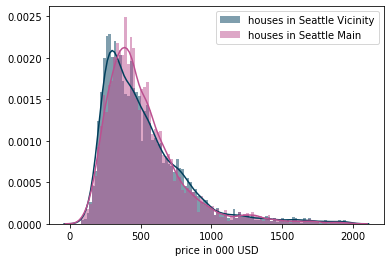

In [84]:
hist_of_dummy_variable('seattle_main', 'houses in Seattle Main', 'houses in Seattle Vicinity')

In [85]:
data.groupby('seattle_main')['price'].describe()

count           mean            std      min       25%  \
seattle_main                                                             
False         12624.0  544000.476077  385287.078038  80000.0  310000.0   
True           8973.0  535085.599911  340518.630540  78000.0  337000.0   

                   50%        75%        max  
seattle_main                                  
False         450000.0  652181.75  7060000.0  
True          453000.0  630000.00  7700000.0

__Question 3 Answer__:
<br>
There is a difference in the distribution based on whether the house is in Seattle Main or Seattle Vicinity. SM seems to have more houses in the middle range, and the median house is a bit more expensive there (453k vs SV's 450k). However, the standard deviation for SV is higher, and on average, those houses are more expensive (544k SV vs 535k SM). 

### Question 4: 
_Do we see a pattern in price vs distance from city centre?_

In [86]:
import matplotlib.gridspec as gridspec

In [87]:
# importing the geodesic package now
# in order to run the next section, you need geopy on your computer:
# $ pip install geopy

from geopy.distance import geodesic 

# testing here if function works

# Loading the lat-long data for Kolkata & Delhi 
kolkata = (22.5726, 88.3639) 
delhi = (28.7041, 77.1025) 
  
# Print the distance calculated in km 
print(geodesic(kolkata, delhi).km) 

# The driving distance between New Delhi and Kolkata is 1462 km, 
# while the aerial distance from New Delhi to Kolkata is 1305 km.

# looks OK

1318.13891581683


In [88]:
def calc_dist(row, dist_from_latt, dist_from_long):
    """
    Formula that returns the distance in kms from a given latt - long pair. 
    Assumes that the row we are passing has a 'lat' and a 'long' column. 
    """
    
    distance = geodesic(
        (dist_from_latt,dist_from_long), \
        (row['lat'],row['long'])
    ).km
    return distance 

In [89]:
# seattle center, from google search
seattle_center_latt = 47.6062
seattle_center_long = -122.3321

In [90]:
# creating a new column where every value is calculated from latt and long, distance from seattle_center
data['distance_from_center'] = data.apply(lambda row: calc_dist(
    row, seattle_center_latt, seattle_center_long
), axis = 1)

Text(0, 0.5, 'price')

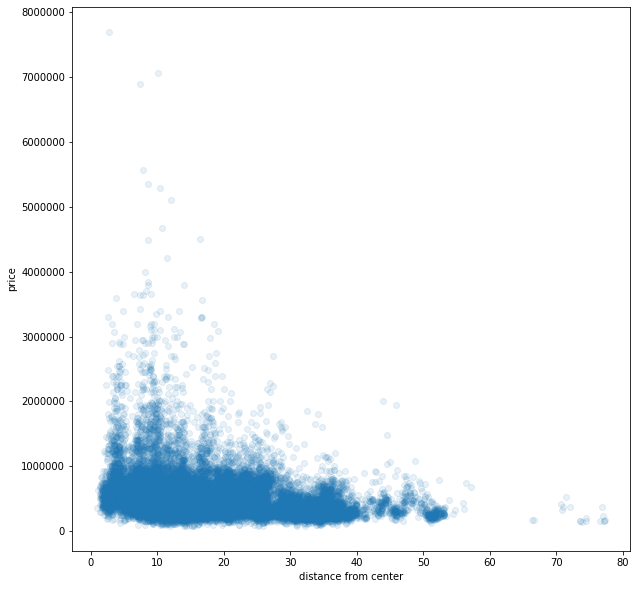

In [91]:
plt.figure(figsize=(10,10))
plt.scatter(x = data['distance_from_center'], y = data['price'], alpha = 0.1)
plt.xlabel('distance from center')
plt.ylabel('price')


In [92]:
#transforming price into log scale
data['price_log'] = np.log(data['price'])

Text(0, 0.5, 'price_log')

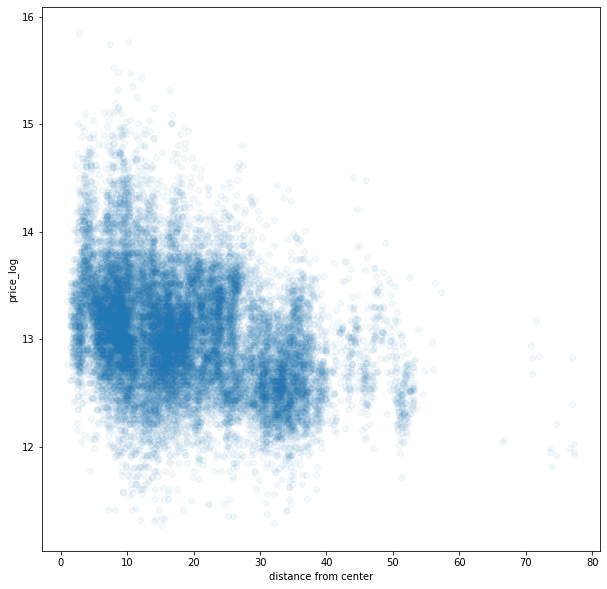

In [93]:
plt.figure(figsize=(10,10))
plt.scatter(x = data['distance_from_center'], y = data['price_log'], alpha = 0.05)
plt.xlabel('distance from center')
plt.ylabel('price_log')


Text(0, 0.5, 'price_log')

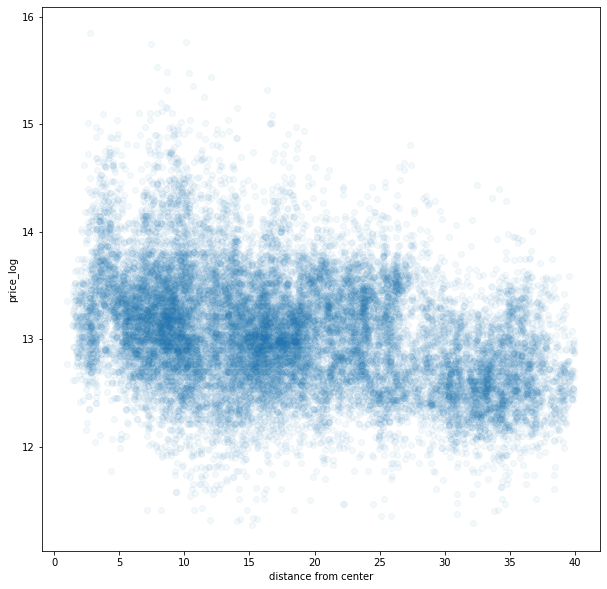

In [94]:
# concentrating on houses < 40 km
data_filtered = data[data['distance_from_center'] < 40]

plt.figure(figsize=(10,10))
plt.scatter(x = data_filtered['distance_from_center'], y = data_filtered['price_log'], alpha = 0.05)
plt.xlabel('distance from center')
plt.ylabel('price_log')


In [164]:
# amazon sphere location
amazon_hq_latt = 47.615556
amazon_hq_long = -122.339444

In [165]:
data['distance_from_amazon'] = data.apply(lambda row: calc_dist(
    row, amazon_hq_latt, amazon_hq_long
), axis = 1)

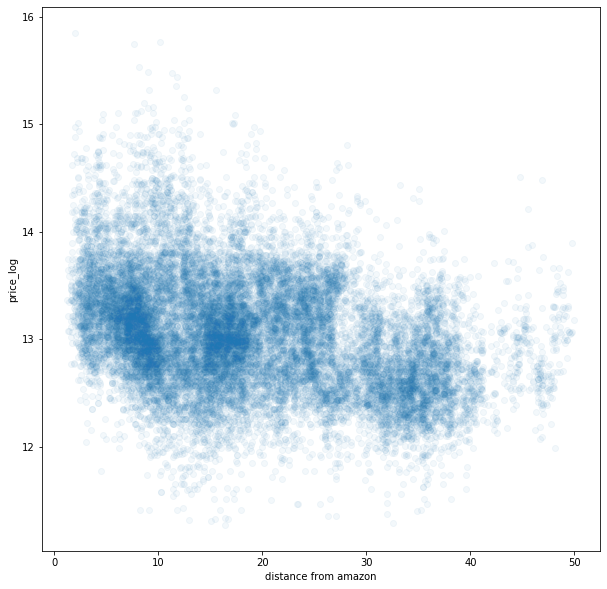

In [166]:
# concentrating on houses < 50 km
data_filtered = data[data['distance_from_amazon'] < 50]

plt.figure(figsize=(10,10))
plt.scatter(x = data_filtered['distance_from_amazon'], y = data_filtered['price_log'], alpha = 0.05)
plt.xlabel('distance from amazon')
plt.ylabel('price_log')

plt.show()

In [169]:
data['sqft_lot_log'] = np.log(data['sqft_lot'])

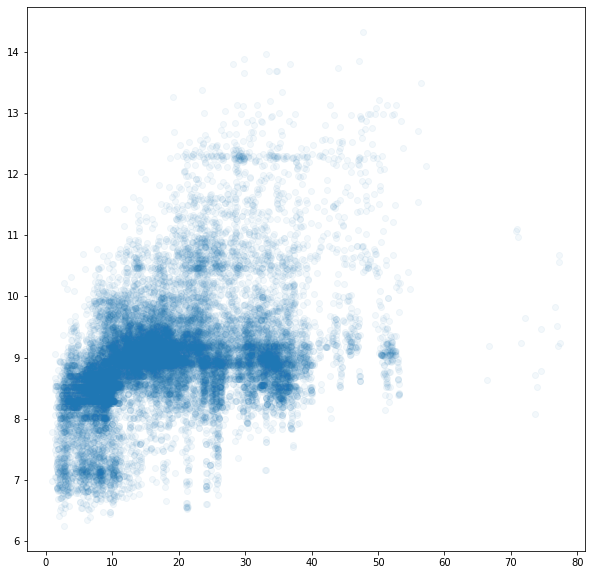

In [170]:
# let's see the lots

data_filtered = data[data['distance_from_center'] < 100]

plt.figure(figsize=(10,10))
plt.scatter(x = data_filtered['distance_from_center'], y = data_filtered['sqft_lot_log'], alpha = 0.05)
plt.show()

In [171]:
# now let's see all of this based on old-new buildings
# creating new variable, based on whether building was built before or after 1975

data['built_after_1975'] = data['yr_built'] > 1975
data_built_after_1975 = data[data['built_after_1975'] == True]
data_built_before_1975 = data[data['built_after_1975'] == False]

In [172]:
def draw_scatter_for_two_populations(data_1, data_2, var_x, var_y, label_1, label_2):

    """
     Draws two scatter plots from two different dataframes, using the same variables.
     Used to visualize the relationship of two variables in two subsets of the original data.
     """
    
    fig = plt.figure(figsize = (20,20))
    
    gridspec.GridSpec(2,3)
    
    #combined plot
     
    plt.subplot2grid((3,3), (0,0), colspan=2, rowspan=2) 

    plt.scatter(
        x = data_1[var_x], 
        y = data_1[var_y], 
        alpha = 0.1, color ='#bc5090', marker = '.')

    plt.scatter(None, None, color = '#bc5090', label =label_1)

    plt.scatter(
        x = data_2[var_x], 
        y = data_2[var_y], 
        alpha = 0.1, color ='#003f5c', marker = '.')

    plt.scatter(None, None, color = '#003f5c', label =label_2)
    
    plt.xlabel(var_x)
    plt.ylabel(var_y)
    
    plt.legend()
    
    # subplot 1
    plt.subplot2grid((3,3), (0,2))
    
    plt.scatter(
        x = data_1[var_x], 
        y = data_1[var_y], 
        alpha = 0.05, color ='#bc5090', marker = '.')
    
    plt.scatter(None, None, color = '#bc5090', label =label_1)
    
    plt.xlabel(var_x)
    plt.ylabel(var_y)
    
    plt.legend()

    # subplot 2
    
    plt.subplot2grid((3,3), (1,2))
    
    plt.scatter(
        x = data_2[var_x], 
        y = data_2[var_y], 
        alpha = 0.05, color ='#003f5c', marker = '.')
    
    plt.scatter(None, None, color = '#003f5c', label =label_2)
        
    plt.xlabel(var_x)
    plt.ylabel(var_y)
    
    plt.legend()
    
    plt.show()


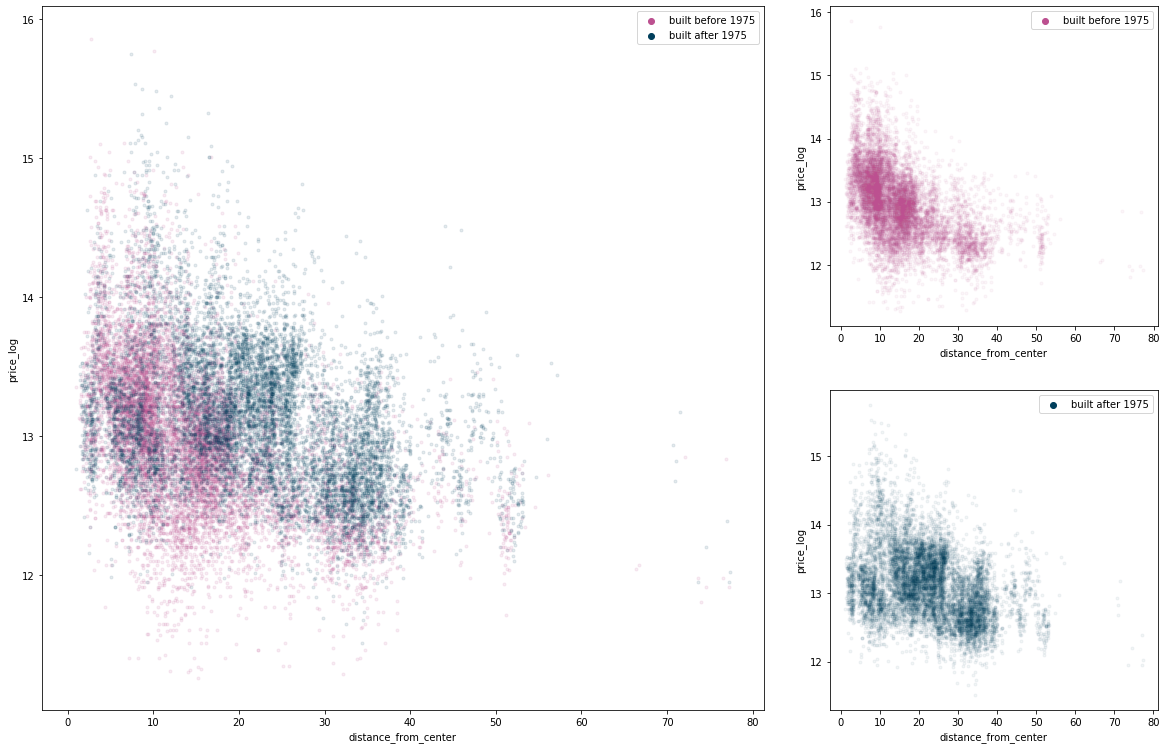

In [173]:
draw_scatter_for_two_populations(
    data_built_before_1975, data_built_after_1975, 
    'distance_from_center', 'price_log', 
    'built before 1975', 'built after 1975')

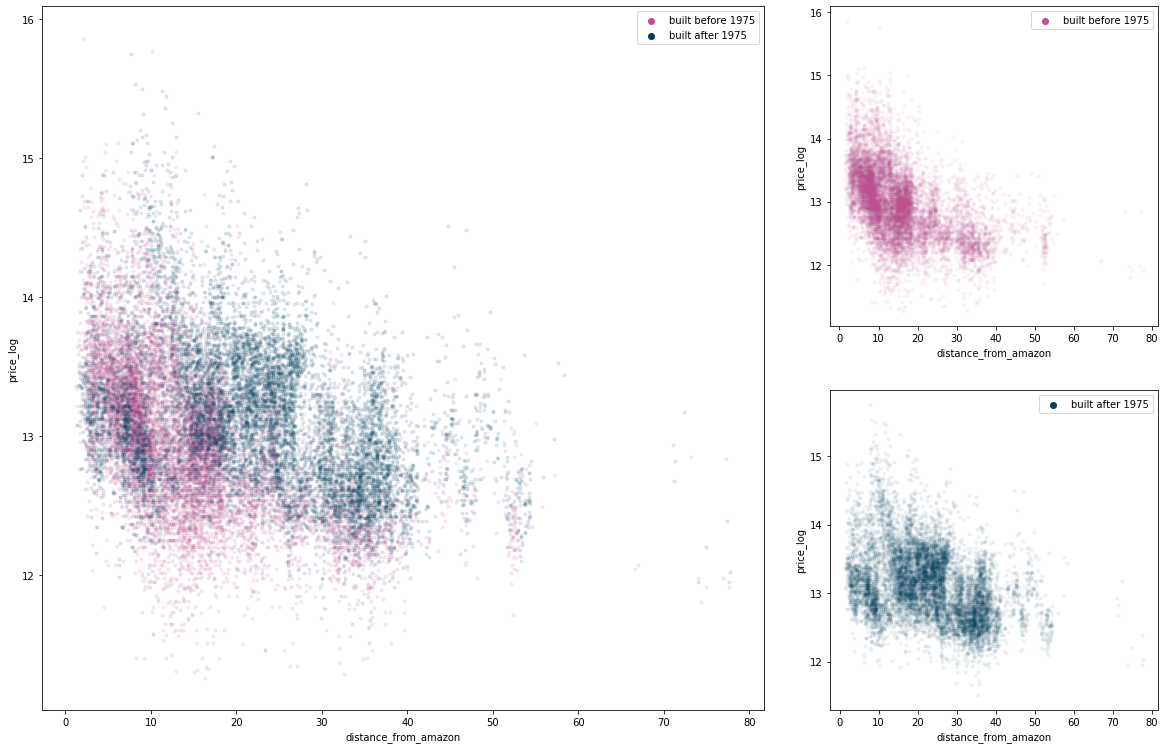

In [174]:
draw_scatter_for_two_populations(
    data_built_before_1975, data_built_after_1975, 
    'distance_from_amazon', 'price_log', 
    'built before 1975', 'built after 1975')

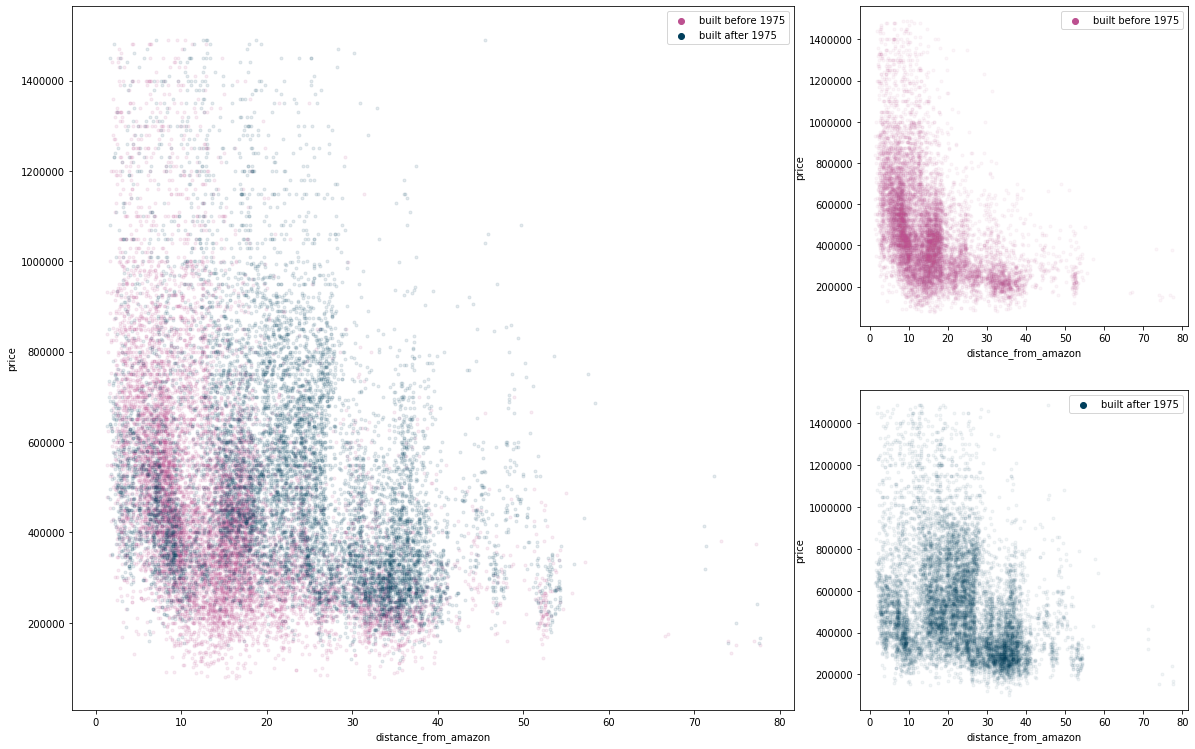

In [175]:
draw_scatter_for_two_populations(
    data_built_before_1975[data_built_before_1975['price']<1500000], 
    data_built_after_1975[data_built_after_1975['price'] < 1500000], 
    'distance_from_amazon', 'price', 
    'built before 1975', 'built after 1975')

Distance from Amazon HQ seems to have a strong connection with the price. This is especially clear for houses built before 1975. We can see that distance from Amazon HQ increases price up until about 30kms, and then there is a steady decrease.
<br>
<br>
In the following, I am exploring if this can be reproduced with the bare lattitude or longitude variables - hopefully the distance is mostly driven by one of the variables.

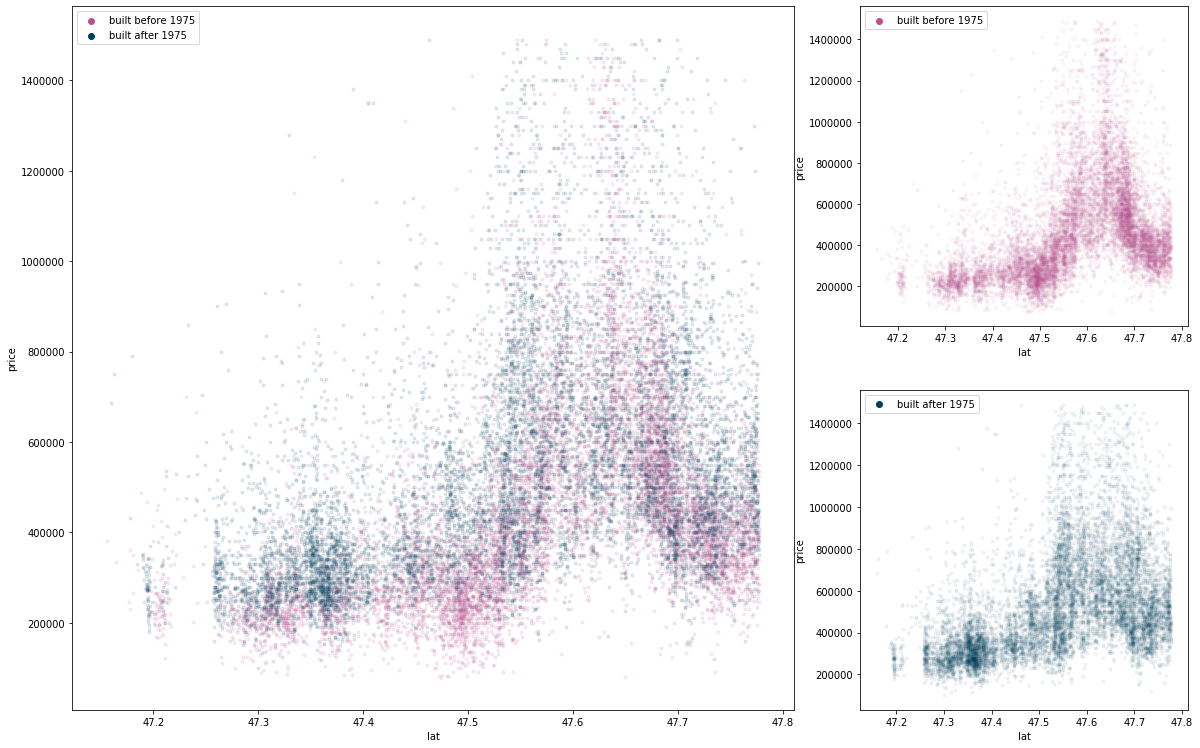

In [176]:
draw_scatter_for_two_populations(
    data_built_before_1975[data_built_before_1975['price']<1500000], 
    data_built_after_1975[data_built_after_1975['price'] < 1500000], 
    'lat', 'price', 
    'built before 1975', 'built after 1975')

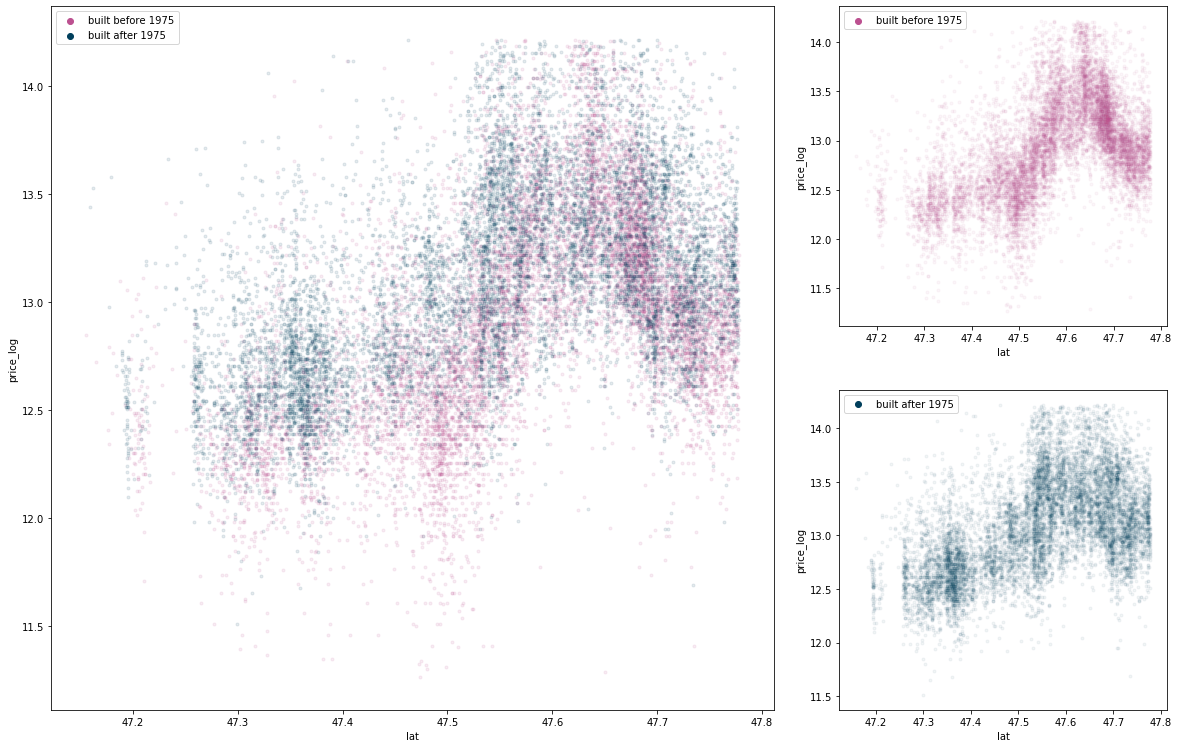

In [177]:
draw_scatter_for_two_populations(
    data_built_before_1975[data_built_before_1975['price']<1500000], 
    data_built_after_1975[data_built_after_1975['price'] < 1500000], 
    'lat', 'price_log', 
    'built before 1975', 'built after 1975')

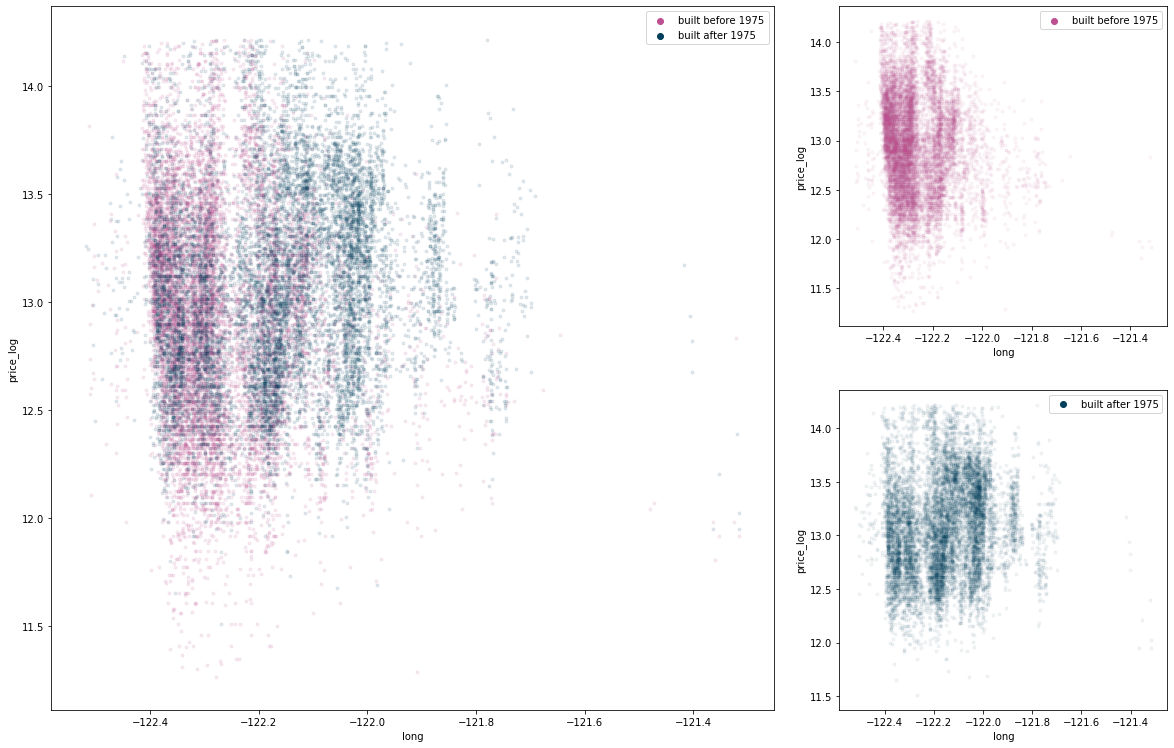

In [178]:
draw_scatter_for_two_populations(
    data_built_before_1975[data_built_before_1975['price']<1500000], 
    data_built_after_1975[data_built_after_1975['price'] < 1500000], 
    'long', 'price_log', 
    'built before 1975', 'built after 1975')

There seems to be a nonlinear connection between distances and prices, especially visible in houses built before 1975.
<br>
<br>
Fortunately, we were able to replicate this behavior with only one of our geographical variables, the lattitude. Up until about 47.65, increasing lattitude increases log price, lattitude after about 47.65 decreases it. Question is, where is the breaking point exactly? Trying to answer this question in the following.

In [108]:
print('Correlation between price_log and lat')
print('Full data: '+ str(data['price_log'].corr(data['lat'])))
print('Before 1975 only: '+ str(data_built_before_1975['price_log'].corr(data_built_before_1975['lat'])))
print('After 1975 only: '+ str(data_built_after_1975['price_log'].corr(data_built_after_1975['lat'])))

Correlation between price_log and lat
Full data: 0.4488369961691189
Before 1975 only: 0.4663634114402604
After 1975 only: 0.4843131615092877


In [109]:
def addRow(df,ls):
    """
    Given a dataframe and a list, append the list as a new row to the dataframe.

    :param df: <DataFrame> The original dataframe
    :param ls: <list> The new row to be added
    :return: <DataFrame> The dataframe with the newly appended row
    """

    numEl = len(ls)

    newRow = pd.DataFrame(np.array(ls).reshape(1,numEl), columns = list(df.columns))

    df = df.append(newRow, ignore_index=True)

    return df

In [110]:
# putting all the correlations in a dataframe so we can pick the splitting point

lattitude_split_df = pd.DataFrame(columns = [
        'latt_split',
        'Full data under latt_split', 'Full data above latt_split',
        'Built before 1975 under latt_split', 'Built before 1975 above latt_split',
        'Built after 1975 under latt_split', 'Built after 1975 above latt_split'
    ])

dataframe_row = [None] * len(lattitude_split_df.columns)

for lat_split_unrounded in np.arange(47.6, 47.7, 0.01):
    lat_split = round(lat_split_unrounded,2)
    
    # first column is simply the split
    dataframe_row[0] = lat_split
    
    # 2nd and 3rd columns are the full data correlations
    dataframe_row[1] = \
    data[data['lat'] < lat_split]['price_log'].corr(data[data['lat'] < lat_split]['lat'])
    
    dataframe_row[2] = \
    data[data['lat'] >= lat_split]['price_log'].corr(data[data['lat'] >= lat_split]['lat'])

    # 4th and 5th columns: same, but with the before 1975 dataframe

    dataframe_row[3] = \
    data_built_before_1975[data_built_before_1975['lat'] < lat_split]['price_log'].corr(
        data_built_before_1975[data_built_before_1975['lat'] < lat_split]['lat'])
    
    dataframe_row[4] = \
    data_built_before_1975[data_built_before_1975['lat'] >= lat_split]['price_log'].corr(
        data_built_before_1975[data_built_before_1975['lat'] >= lat_split]['lat'])
    
    # 6th and 7th columns: same, but with the after 1975 dataframe
    
    dataframe_row[5] = \
    data_built_after_1975[data_built_after_1975['lat'] < lat_split]['price_log'].corr(
        data_built_after_1975[data_built_after_1975['lat'] < lat_split]['lat'])
    
    dataframe_row[6] = \
    data_built_after_1975[data_built_after_1975['lat'] >= lat_split]['price_log'].corr(
        data_built_after_1975[data_built_after_1975['lat'] >= lat_split]['lat'])
    
    lattitude_split_df = addRow(lattitude_split_df, dataframe_row)


lattitude_split_df

latt_split  Full data under latt_split  Full data above latt_split  \
0        47.60                    0.505772                   -0.419387   
1        47.61                    0.516852                   -0.442645   
2        47.62                    0.531503                   -0.453768   
3        47.63                    0.552536                   -0.443786   
4        47.64                    0.578752                   -0.397781   
5        47.65                    0.591535                   -0.355462   
6        47.66                    0.595458                   -0.336165   
7        47.67                    0.599880                   -0.296790   
8        47.68                    0.598732                   -0.247203   
9        47.69                    0.593180                   -0.159461   
10       47.70                    0.574159                   -0.128342   

    Built before 1975 under latt_split  Built before 1975 above latt_split  \
0                             0.506855                           -0.514224   
1                             0.522642                           -0.550720   
2                             0.543844                           -0.565223   
3                             0.571668                           -0.561420   
4                             0.609189                           -0.519380   
5                             0.627082                           -0.479498   
6                             0.634678                           -0.457642   
7                             0.640727                           -0.420553   
8                             0.642236                           -0.351420   
9                             0.635475                           -0.216448   
10                            0.618028                           -0.158834   

    Built after 1975 under latt_split  Built after 1975 above latt_split  
0                            0.599820                          -0.315481  
1                            0.605134                          -0.321051  
2                            0.608832                          -0.329696  
3                            0.616341                          -0.316423  
4                            0.624848                          -0.275201  
5                            0.628955                          -0.239140  
6                            0.626267                          -0.231865  
7                            0.626457                          -0.194914  
8                            0.620958                          -0.166367  
9                            0.616877                          -0.094580  
10                           0.591039                          -0.094518

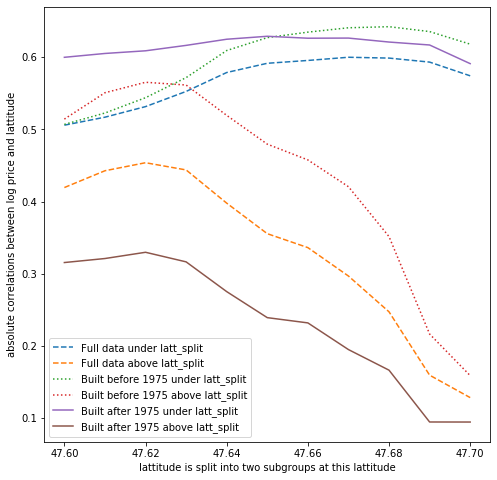

In [111]:
# quick visualization below, I am showing the absolute correlations for the negative ones

plt.figure(figsize = (8,8))

plt.plot(
    lattitude_split_df['latt_split'],lattitude_split_df['Full data under latt_split'] , 
    label = 'Full data under latt_split', linestyle = '--')

plt.plot(
    lattitude_split_df['latt_split'],np.abs(lattitude_split_df['Full data above latt_split']) , 
    label = 'Full data above latt_split', linestyle = '--')

plt.plot(
    lattitude_split_df['latt_split'],lattitude_split_df['Built before 1975 under latt_split'] , 
    label = 'Built before 1975 under latt_split', linestyle = ':')

plt.plot(
    lattitude_split_df['latt_split'],np.abs(lattitude_split_df['Built before 1975 above latt_split']) , 
    label = 'Built before 1975 above latt_split', linestyle = ':')

plt.plot(
    lattitude_split_df['latt_split'],lattitude_split_df['Built after 1975 under latt_split'] , 
    label = 'Built after 1975 under latt_split')

plt.plot(
    lattitude_split_df['latt_split'],np.abs(lattitude_split_df['Built after 1975 above latt_split']) , 
    label = 'Built after 1975 above latt_split')

plt.xlabel('lattitude is split into two subgroups at this lattitude')
plt.ylabel('absolute correlations between log price and lattitude')

plt.legend()

plt.show()

There is not that much increase for the under latt_split part, but the above part's correlation decreases rapidly. Based on the chart above, I think we should pick __47.62__ as the lattitude to split the data by. In the main jpynb file, I am going to calculate an absolute latt diff from 47.62. 

__Question 4 Answer__: 
<br>
<br>
There is a connection between price and distance from city center. The relationship with log price seems to be more linear, so we are using that variable. 
<br>
<br>
The relationship seems to be driven by the lattitude variable, so we are analyzing that in the following (mainly to avoid having to have a library that is not in learn-env installed to replicate this project). 
<br>
<br>
After charting the data, we can see an increasing then decreasing relationship between lattitude and log price, this relationship is more obvious in the subgroup of buildings built before 1975. Based on the correlations between the different subgroup I decided that 47.62 should be the middle point lattitude. Prices are expected to increase by lattitude until this point, and they are expected to decrease above this. I calculate a new variable that shows the absolute lattitude distance from this point later in the liner regression section. 


### Question 5: 
_Which variables correlate with each other?_

In [112]:
# we are starting to answer that question by throwing a seaborn pairplot on the data

In [113]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'built_after_1975', 'sold_in_2nd_half', 'year_month',
       'seattle_main', 'distance_from_center', 'price_log',
       'distance_from_amazon', 'sqft_lot_log'],
      dtype='object')

In [114]:
columns_to_check_correlation = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
                   'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 
                  'lat', 'long', 'sqft_living15', 'sqft_lot15']

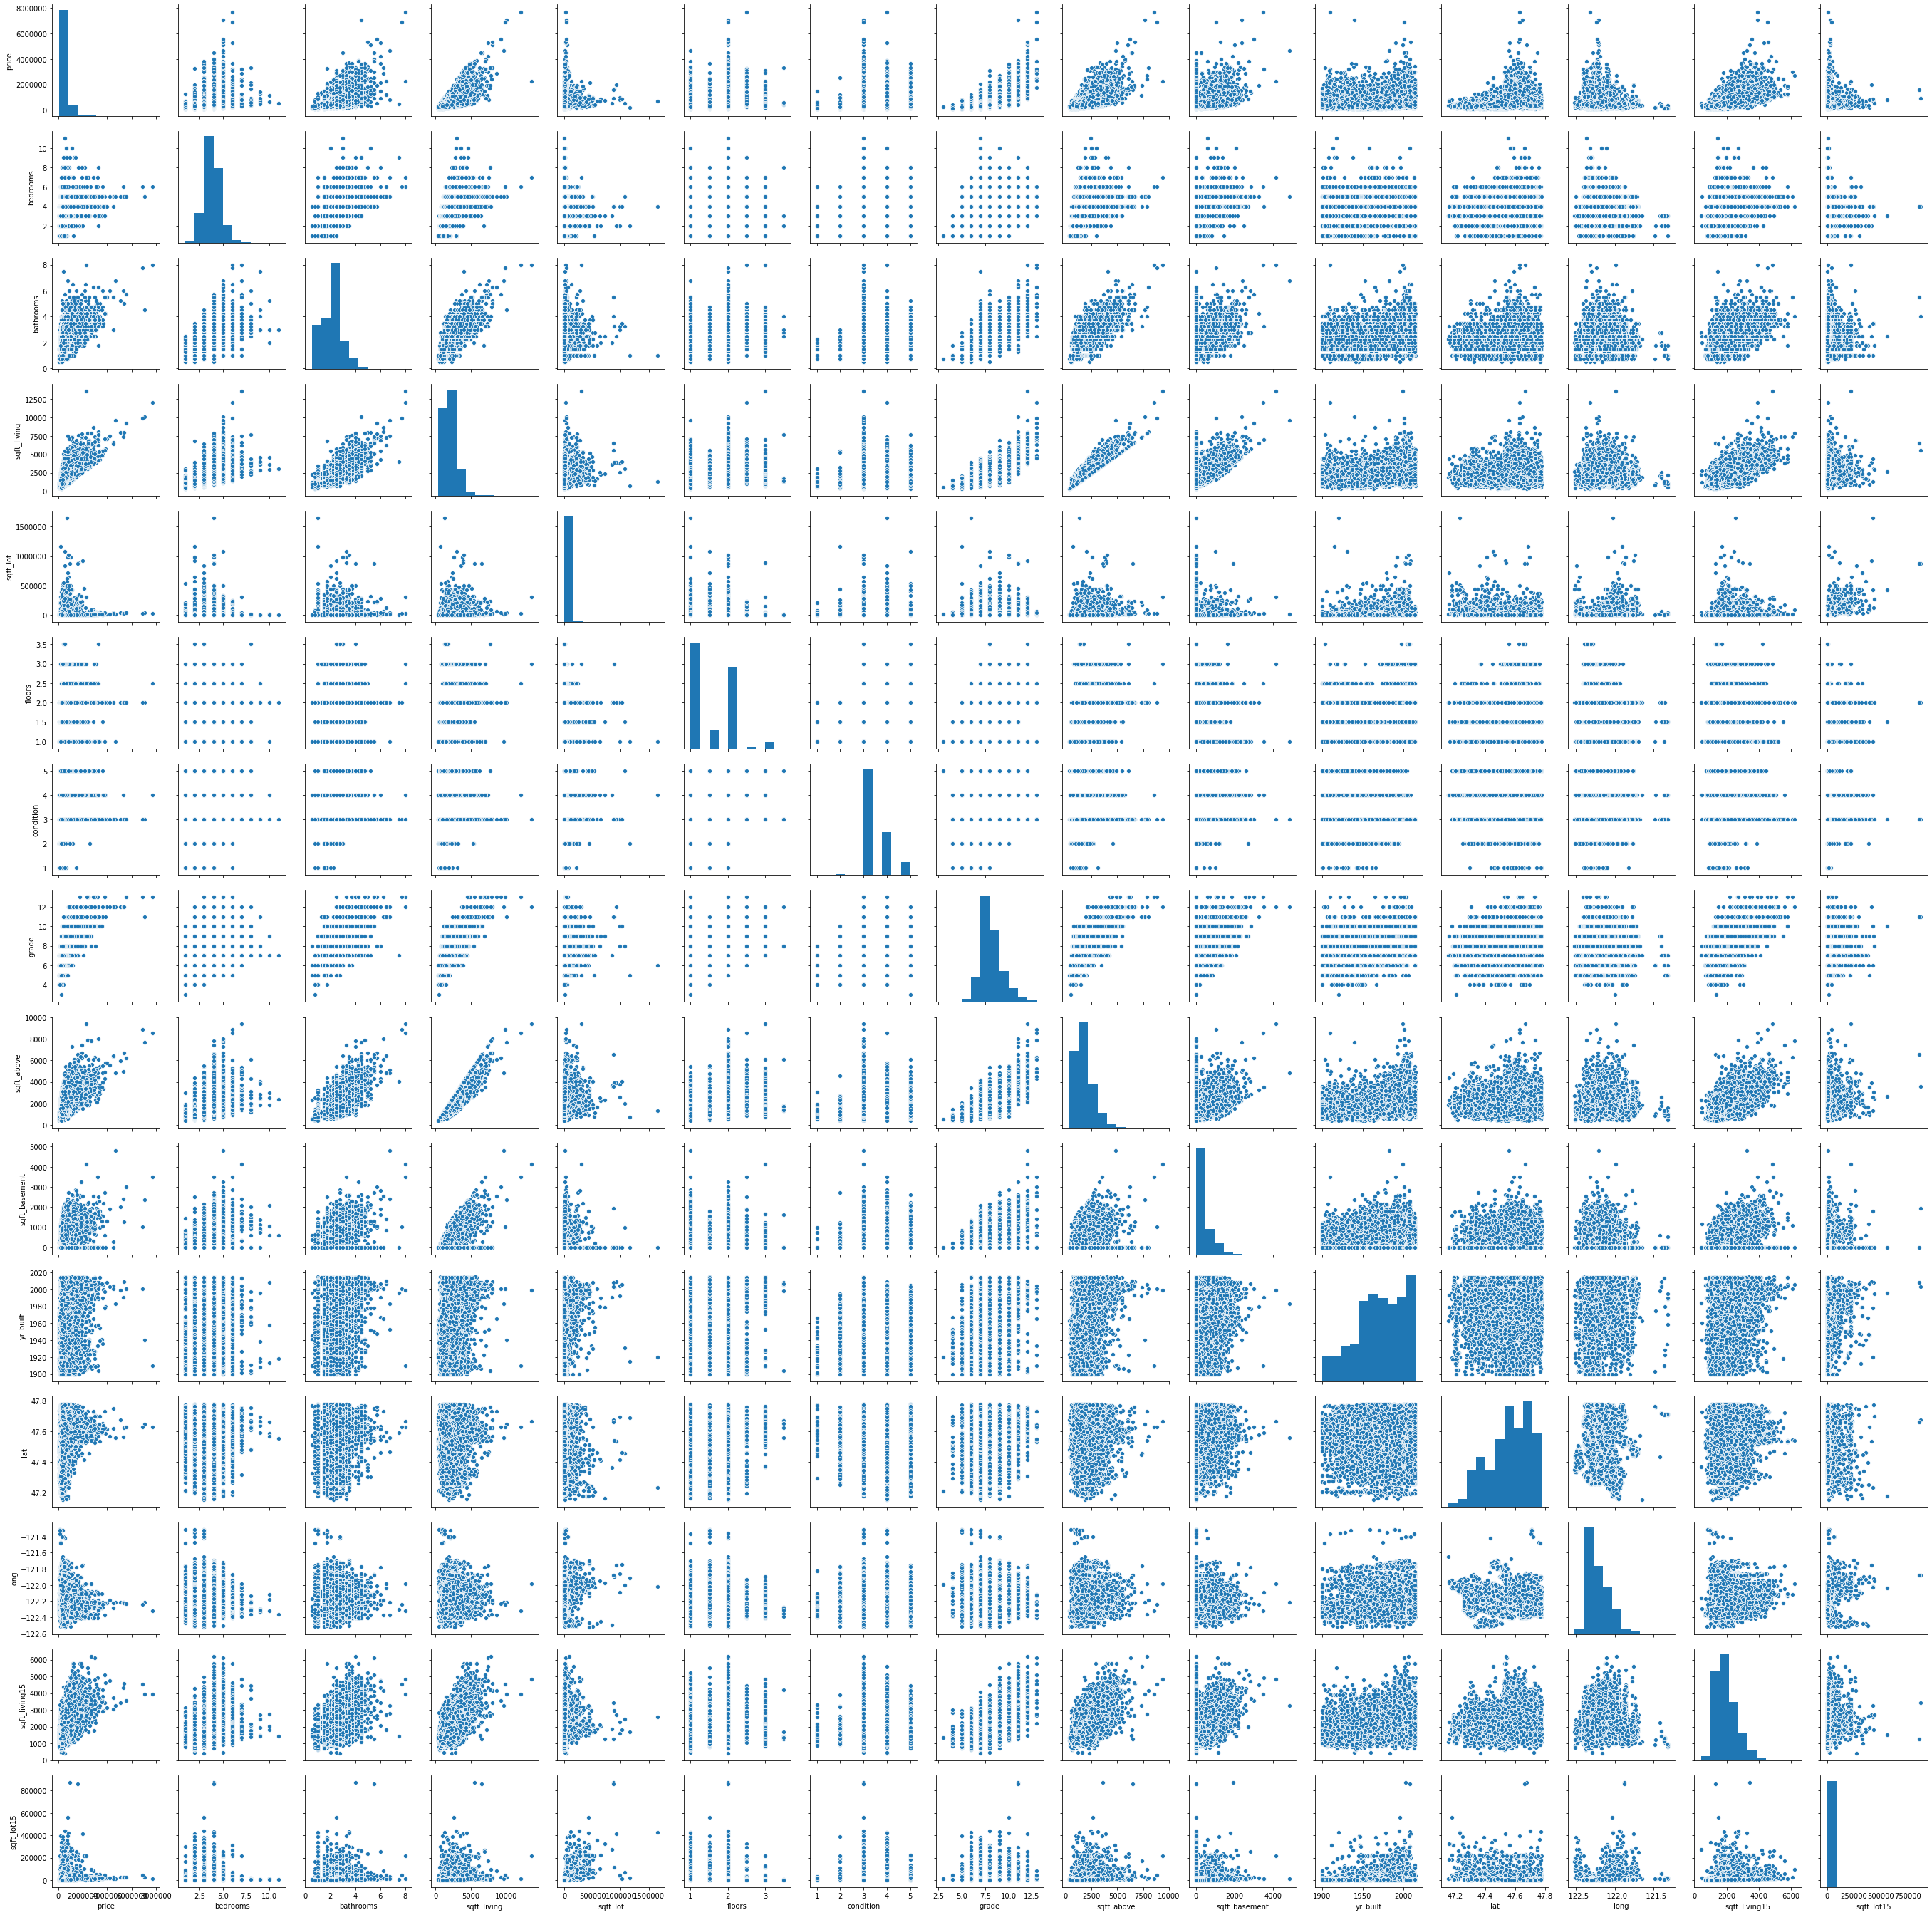

In [155]:
# commented it out because it takes too long to run

# sns.pairplot(data[columns_to_check_correlation])

In [113]:
# that is moderately useful, trying a heatmap next

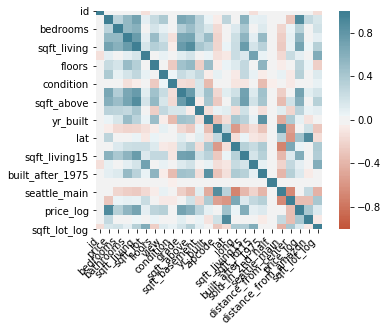

In [115]:
corr = data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

I don't think the chart above is particularly useful, going to list the higher correlation pairs instead. 

In [116]:
# organizing the significant correlation pairs in a series
# going to repeat the pairs so it is easier to read
# omitting price because we will analyse that separately later anyway

def create_corr_pair_matrix(correlation_threshold):

    sign_correlation_pairs = pd.DataFrame(columns = ['variable_1', 'variable_2', 'correlation'])
    dataframe_row = [None] * len(sign_correlation_pairs.columns)

    for column_name_1 in columns_to_check_correlation[1:]:
        for column_name_2 in columns_to_check_correlation[1:]:
            current_corr = data[column_name_1].corr(data[column_name_2])
            if (column_name_1 != column_name_2) \
            and \
            (np.abs(current_corr) > correlation_threshold):
                dataframe_row[0] = column_name_1
                dataframe_row[1] = column_name_2
                dataframe_row[2] = current_corr
                sign_correlation_pairs = addRow(sign_correlation_pairs, dataframe_row)

    return sign_correlation_pairs


In [117]:
create_corr_pair_matrix(0.6)

variable_1     variable_2         correlation
0       bathrooms    sqft_living  0.7557576009502521
1       bathrooms          grade  0.6658378437948657
2       bathrooms     sqft_above  0.6866677932024465
3     sqft_living      bathrooms  0.7557576009502521
4     sqft_living          grade  0.7627790466721344
5     sqft_living     sqft_above  0.8764477590354981
6     sqft_living  sqft_living15  0.7564015282475002
7        sqft_lot     sqft_lot15  0.7182040308060953
8           grade      bathrooms  0.6658378437948657
9           grade    sqft_living  0.7627790466721344
10          grade     sqft_above   0.756072569819375
11          grade  sqft_living15  0.7138671178655327
12     sqft_above      bathrooms  0.6866677932024466
13     sqft_above    sqft_living  0.8764477590354981
14     sqft_above          grade   0.756072569819375
15     sqft_above  sqft_living15  0.7317668038477547
16  sqft_living15    sqft_living  0.7564015282475001
17  sqft_living15          grade  0.7138671178655327
18  sqft_living15     sqft_above  0.7317668038477547
19     sqft_lot15       sqft_lot  0.7182040308060953

In [118]:
create_corr_pair_matrix(0.7)

variable_1     variable_2         correlation
0       bathrooms    sqft_living  0.7557576009502521
1     sqft_living      bathrooms  0.7557576009502521
2     sqft_living          grade  0.7627790466721344
3     sqft_living     sqft_above  0.8764477590354981
4     sqft_living  sqft_living15  0.7564015282475002
5        sqft_lot     sqft_lot15  0.7182040308060953
6           grade    sqft_living  0.7627790466721344
7           grade     sqft_above   0.756072569819375
8           grade  sqft_living15  0.7138671178655327
9      sqft_above    sqft_living  0.8764477590354981
10     sqft_above          grade   0.756072569819375
11     sqft_above  sqft_living15  0.7317668038477547
12  sqft_living15    sqft_living  0.7564015282475001
13  sqft_living15          grade  0.7138671178655327
14  sqft_living15     sqft_above  0.7317668038477547
15     sqft_lot15       sqft_lot  0.7182040308060953

__Question 5 Answer__: 
<br>
<br>
There is a group of 7 variables with higher than 0.7 correlation (0.7 is the correlation threshold we decided to apply) among its members: 
<br>
{bathrooms, sqft_living, sqft_lot, grade, sqft_above, sqft_living15, sqft_lot15}
<br>
Out of these 7 variables, we should not use more than one in the liner regression. The others can be used freely. 
<br>
<br>
I think Question 5 is a good example for when you rather want to use tables and text than a visualization, at least in this specific case.

### Question 6: 
_Based on the percentiles, should we drop any other rows from the data when we fit the linear regression?_

In [119]:
# We have already done the price, repeating it here

In [120]:
for i in range(0,10):
    print(str((1-i/100) * 100) + '% percentile of price variable: ' + str(data['price'].quantile(1-i/100)))

100.0% percentile of price variable: 7700000.0
99.0% percentile of price variable: 1970000.0
98.0% percentile of price variable: 1600000.0
97.0% percentile of price variable: 1390000.0
96.0% percentile of price variable: 1260000.0
95.0% percentile of price variable: 1160000.0
94.0% percentile of price variable: 1060000.0
93.0% percentile of price variable: 997964.0000000002
92.0% percentile of price variable: 950000.0
91.0% percentile of price variable: 919993.6


In [121]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'built_after_1975', 'sold_in_2nd_half', 'year_month',
       'seattle_main', 'distance_from_center', 'price_log',
       'distance_from_amazon', 'sqft_lot_log'],
      dtype='object')

In [122]:
# showing the variables in a dataframe, rows are the variables, columns are the 95th to 100th percentiles
# also showing the percentage increase between current percentile and previous

percentile_dataframe=pd.DataFrame(columns =[
    'variable_name', 'perc_95', 'perc_96', 'perc_97', 'perc_98', 'perc_99', 'perc_100',
    'perc_96_increase', 'perc_97_increase', 'perc_98_increase', 'perc_99_increase', 'perc_100_increase'] )

list_of_columns_to_analyse_perc = ['price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'sqft_above','sqft_basement', 'sqft_living15','sqft_lot15']

dataframe_row = [None] * len(percentile_dataframe.columns)

for variable in list_of_columns_to_analyse_perc:
    dataframe_row[0] = variable
    for i in range(1, 7):
        perc = 94 + i
        dataframe_row[i] = round(data[variable].quantile(perc / 100),2)
    for j in range(7,12):
        dataframe_row[j] = str(round((((dataframe_row[j-5] / dataframe_row[j-6]) - 1) * 100),2)) + '%'
    percentile_dataframe = addRow(percentile_dataframe, dataframe_row)

In [123]:
percentile_dataframe.iloc[:, 0:7]

variable_name    perc_95    perc_96    perc_97    perc_98    perc_99  \
0          price  1160000.0  1260000.0  1390000.0  1600000.0  1970000.0   
1       bedrooms        5.0        5.0        5.0        5.0        6.0   
2      bathrooms        3.5        3.5        3.5       3.75       4.25   
3    sqft_living     3760.0     3920.0     4140.0     4410.0     4980.0   
4       sqft_lot    43307.2   50655.28   67381.72   107157.0   213008.0   
5         floors        2.0        2.0        2.5        3.0        3.0   
6     sqft_above     3400.0     3520.0     3700.0     3970.0     4370.0   
7  sqft_basement     1180.0     1250.0     1330.0     1440.0     1660.0   
8  sqft_living15     3300.0     3420.0     3560.0     3760.8     4080.0   
9     sqft_lot15    37045.2   42627.88    51400.0   80152.24   157687.0   

    perc_100  
0  7700000.0  
1       11.0  
2        8.0  
3    13540.0  
4  1651359.0  
5        3.5  
6     9410.0  
7     4820.0  
8     6210.0  
9   871200.0

In [124]:
percentile_dataframe.iloc[:, [0, 7, 8, 9, 10, 11]]

variable_name perc_96_increase perc_97_increase perc_98_increase  \
0          price            8.62%           10.32%           15.11%   
1       bedrooms             0.0%             0.0%             0.0%   
2      bathrooms             0.0%             0.0%            7.14%   
3    sqft_living            4.26%            5.61%            6.52%   
4       sqft_lot           16.97%           33.02%           59.03%   
5         floors             0.0%            25.0%            20.0%   
6     sqft_above            3.53%            5.11%             7.3%   
7  sqft_basement            5.93%             6.4%            8.27%   
8  sqft_living15            3.64%            4.09%            5.64%   
9     sqft_lot15           15.07%           20.58%           55.94%   

  perc_99_increase perc_100_increase  
0           23.12%           290.86%  
1            20.0%            83.33%  
2           13.33%            88.24%  
3           12.93%           171.89%  
4           98.78%           675.26%  
5             0.0%            16.67%  
6           10.08%           115.33%  
7           15.28%           190.36%  
8            8.49%            52.21%  
9           96.73%           452.49%

Decision: cutting variables where the increase is over 50%. 


price: at 99th percentile


bedrooms: at 99th percentile


bathrooms: at 99th percentile


sqft_living: at 99th percentile


sqft_lot: at 97th percentile


sqft_above: at 99th percentile


sqft_basement: at 99th percentile


sqft_living15: at 99th percentile


sqft_lot: at 97th percentile

## Section 3 - Linear Regression

### Step 1 - Filtering the Data

As a first step, we create a new filtered database, based on the conditions we outlined in Section 1. These rules are, once again: 

- condition > 1
- grade > 4
- price < perc(price, 99%)
- same treatment as price for { bedrooms, bathrooms, sqft_living, sqft_above, sqft_basement, sqft_living 15 }
- sqft_lot < perc(sqft_lot, 97%)
- same treatment as sqft_lot for {sqft_lot15}


In [125]:
data_filtered = \
data[
    (data['condition'] > 1) & 
    (data['grade']> 4) & 
    (data['price'] <= data['price'].quantile(0.99)) & 
    (data['bedrooms'] <= data['bedrooms'].quantile(0.99)) &
    (data['bathrooms'] <= data['bathrooms'].quantile(0.99)) &
    (data['sqft_living'] <= data['sqft_living'].quantile(0.99)) &
    (data['sqft_above'] <= data['sqft_above'].quantile(0.99)) &
    (data['sqft_basement'] <= data['sqft_basement'].quantile(0.99)) &
    (data['sqft_living15'] <= data['sqft_living15'].quantile(0.99)) &
    (data['sqft_lot'] <= data['sqft_lot'].quantile(0.97)) &
    (data['sqft_lot15'] <= data['sqft_lot15'].quantile(0.97))    
    ].copy()

In [126]:
data_filtered.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.003100e+04  2.003100e+04  20031.000000  20031.000000  20031.000000   
mean   4.683428e+09  5.016132e+05      3.331137      2.056300   1976.060007   
std    2.874847e+09  2.649850e+05      0.855354      0.697633    758.753076   
min    1.000102e+06  8.200000e+04      1.000000      0.500000    370.000000   
25%    2.214800e+09  3.150000e+05      3.000000      1.500000   1400.000000   
50%    4.036100e+09  4.400000e+05      3.000000      2.250000   1860.000000   
75%    7.436900e+09  6.180000e+05      4.000000      2.500000   2440.000000   
max    9.900000e+09  1.970000e+06      6.000000      4.250000   4970.000000   

           sqft_lot        floors          view     condition         grade  \
count  20031.000000  20031.000000  20031.000000  20031.000000  20031.000000   
mean    9072.472817      1.485647      0.191803      3.414857      7.565723   
std     7965.712751      0.540710      0.685820      0.644518      1.048576   
min      520.000000      1.000000      0.000000      2.000000      5.000000   
25%     5000.000000      1.000000      0.000000      3.000000      7.000000   
50%     7350.000000      1.000000      0.000000      3.000000      7.000000   
75%     9900.000000      2.000000      0.000000      4.000000      8.000000   
max    67269.000000      3.500000      4.000000      5.000000     12.000000   

       ...      yr_built       zipcode           lat          long  \
count  ...  20031.000000  20031.000000  20031.000000  20031.000000   
mean   ...   1970.431082  98079.819280     47.561487   -122.221407   
std    ...     29.504375     53.851609      0.138258      0.135911   
min    ...   1900.000000  98001.000000     47.155900   -122.512000   
25%    ...   1951.000000  98033.000000     47.473800   -122.332000   
50%    ...   1973.000000  98072.000000     47.573000   -122.246000   
75%    ...   1996.000000  98118.000000     47.679700   -122.139000   
max    ...   2015.000000  98199.000000     47.777600   -121.315000   

       sqft_living15    sqft_lot15  distance_from_center     price_log  \
count   20031.000000  20031.000000          20031.000000  20031.000000   
mean     1923.226499   8564.743398             18.061890     13.006149   
std       611.563936   6756.290464             10.425445      0.483566   
min       460.000000    651.000000              0.986016     11.314475   
25%      1470.000000   5000.000000              9.637049     12.660328   
50%      1800.000000   7438.000000             16.180941     12.994530   
75%      2290.000000   9600.000000             24.552753     13.334244   
max      4080.000000  51400.000000             77.316100     14.493544   

       distance_from_amazon  sqft_lot_log  
count          20031.000000  20031.000000  
mean              25.901051      8.857558  
std               12.117481      0.712339  
min                0.213108      6.253829  
25%               15.001463      8.517193  
50%               26.485530      8.902456  
75%               36.513908      9.200290  
max               77.157590     11.116455  

[8 rows x 22 columns]

In [127]:
data.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.159700e+04  2.159700e+04  21597.000000  21597.000000  21597.000000   
mean   4.580474e+09  5.402966e+05      3.371811      2.115826   2080.321850   
std    2.876736e+09  3.673681e+05      0.904096      0.768984    918.106125   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.123049e+09  3.220000e+05      3.000000      1.750000   1430.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     11.000000      8.000000  13540.000000   

           sqft_lot        floors          view     condition         grade  \
count  2.159700e+04  21597.000000  21597.000000  21597.000000  21597.000000   
mean   1.509941e+04      1.494096      0.233181      3.409825      7.657915   
std    4.141264e+04      0.539683      0.764673      0.650546      1.173200   
min    5.200000e+02      1.000000      0.000000      1.000000      3.000000   
25%    5.040000e+03      1.000000      0.000000      3.000000      7.000000   
50%    7.618000e+03      1.500000      0.000000      3.000000      7.000000   
75%    1.068500e+04      2.000000      0.000000      4.000000      8.000000   
max    1.651359e+06      3.500000      4.000000      5.000000     13.000000   

       ...      yr_built       zipcode           lat          long  \
count  ...  21597.000000  21597.000000  21597.000000  21597.000000   
mean   ...   1970.999676  98077.951845     47.560093   -122.213982   
std    ...     29.375234     53.513072      0.138552      0.140724   
min    ...   1900.000000  98001.000000     47.155900   -122.519000   
25%    ...   1951.000000  98033.000000     47.471100   -122.328000   
50%    ...   1975.000000  98065.000000     47.571800   -122.231000   
75%    ...   1997.000000  98118.000000     47.678000   -122.125000   
max    ...   2015.000000  98199.000000     47.777600   -121.315000   

       sqft_living15     sqft_lot15  distance_from_center     price_log  \
count   21597.000000   21597.000000          21597.000000  21597.000000   
mean     1986.620318   12758.283512             18.472451     13.048211   
std       685.230472   27274.441950             10.649863      0.526555   
min       399.000000     651.000000              0.986016     11.264464   
25%      1490.000000    5100.000000              9.788719     12.682307   
50%      1840.000000    7620.000000             16.528211     13.017003   
75%      2360.000000   10083.000000             25.305748     13.377006   
max      6210.000000  871200.000000             77.316100     15.856731   

       distance_from_amazon  sqft_lot_log  
count          21597.000000  21597.000000  
mean              25.953380      8.989805  
std               12.027888      0.902078  
min                0.213108      6.253829  
25%               15.289442      8.525161  
50%               26.542000      8.938269  
75%               36.370949      9.276596  
max               77.157590     14.317109  

[8 rows x 22 columns]

After excluding the observations that we deemed to be outliers, 20,031rows remained of the original 21,579. This is a lot, we lost almost 10% of our data. 


Next, we are adjusting the price so it is in 000 USD to make results easier to read. 

In [128]:
data_filtered['price'] = data_filtered['price'].apply(lambda x: x / 1000)
data_filtered.rename(columns = {'price' : 'price_USD000'}, inplace = True)

Next, importing libraries. 

In [129]:
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols
import statsmodels.api as sm
import scipy.stats as stats

### Step 2 - Analysis with 1 Independent Variable

In [130]:
indep_vars = [
    'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 
    'floors', 'view', 'condition', 'grade', 'sqft_above', 
    'sqft_basement', 'yr_built', 'lat', 'long', 
    'sqft_living15', 'sqft_lot15'
]

In [131]:
statsummary_name = ['Independent Variable','R Squared','Intercept', 'Slope', 'P-Value', 'Normality (JB)']
statsummary_value = [None] * len(statsummary_name)
statsummary_data = pd.DataFrame(columns = statsummary_name)

for indep_var in indep_vars: 
    
    f = "price_USD000 ~ " + indep_var
    mod = ols(formula = f, data = data_filtered)
    res = mod.fit()
    
    statsummary_value[0] = indep_var
    statsummary_value[1] = res.rsquared
    statsummary_value[2] = res.params[0]
    statsummary_value[3] = res.params[1]
    statsummary_value[4] = res.pvalues[1]
    statsummary_value[5] = sms.jarque_bera(res.resid)[0]
    
    statsummary_data = addRow(statsummary_data, statsummary_value)
    

In [132]:
statsummary_data.sort_values(by = 'R Squared', ascending = False)

Independent Variable              R Squared            Intercept  \
12                 long  4.769226096401624e-05    2147.271006904487   
7                 grade     0.4144703719205952    -729.274754370761   
2           sqft_living    0.40294070878273724    63.54516518785068   
13        sqft_living15     0.3140217242736718    34.64238229929445   
8            sqft_above    0.28264343162612326   164.56142621605062   
1             bathrooms    0.20813286027338596   145.28435082877473   
11                  lat     0.1544681984479026  -35325.044465179126   
5                  view    0.10972726495313023   477.06479226927615   
0              bedrooms    0.08845339308655409   194.69335117878722   
4                floors    0.07139304589489281   307.07703170673176   
9         sqft_basement    0.06393480362370452   457.01808157425904   
3              sqft_lot    0.01028228115088703     471.009971320571   
14           sqft_lot15   0.009927098661290823    468.1445130079329   
6             condition  0.0024888055340546167    431.5719090530299   
10             yr_built  0.0004485485877484541   126.81206233610783   

                   Slope                 P-Value      Normality (JB)  
12     13.46456285859504     0.32839231091328347  25791.101106334096  
7     162.69270261632022                     0.0   22538.03564014424  
2    0.22168761172239893                     0.0   17868.36919757639  
13   0.24280593404819678                     0.0  26729.602324806106  
8     0.1975820122552439                     0.0  20207.477144168082  
1     173.28638684499924                     0.0  22113.968509151524  
11     753.2703499877136                     0.0   37923.23855106068  
5     127.98774858254315                     0.0  21263.257007322132  
0      92.13666736411163                     0.0   25296.17896353291  
4     130.94370650500557                     0.0   26038.41152049349  
9    0.16856763947189257  9.836470892367451e-290  25588.577274221258  
3   0.003373194723610584   6.185390962561997e-47    25193.3468204173  
14  0.003907726617746624  2.2880763857954433e-45   24932.59470295136  
6     20.510750606826633   1.610299245131405e-12   25545.70743636639  
10   0.19021275591863107   0.0027208998812229216  25784.532011644336

In [133]:
# the best one variable model seems to be that of variable 'grade'
# running it again with statistics from statsmodels

f = "price_USD000 ~ grade"
mod = ols(formula = f, data = data_filtered)
res = mod.fit()

res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           price_USD000   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.414
Method:                 Least Squares   F-statistic:                 1.418e+04
Date:                Tue, 21 Jan 2020   Prob (F-statistic):               0.00
Time:                        14:50:02   Log-Likelihood:            -1.3483e+05
No. Observations:               20031   AIC:                         2.697e+05
Df Residuals:                   20029   BIC:                         2.697e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -729.2748     10.436    -69.878      0.000    -749.731    -708.819
grade        162.6927      1.366    119.070      0.000     160.015     165.371
==============================================================================
Omnibus:                     5927.055   Durbin-Watson:                   1.938
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            22538.036
Skew:                           1.443   Prob(JB):                         0.00
Kurtosis:                       7.321   Cond. No.                         56.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [134]:
def linear_regr_analysis_charts(indep_var, dep_var, data, residual_analysis = True, scatterplot_analysis = True):
    
    """
    Draws scatter plot and residual charts for a 
    linear regression based on one independent variable. 
    
    """
    
    f = dep_var + " ~ " + indep_var
    mod = ols(formula = f, data = data)
    res = mod.fit()
    
    if scatterplot_analysis:
    
        x_minmax = pd.DataFrame({indep_var: [data[indep_var].min(), data[indep_var].max()]})
        y_minmax = res.predict(x_minmax)

        plt.figure(figsize=(8,4))
        plt.scatter(data[indep_var], data[dep_var], color = "#618eb8")
        plt.plot(x_minmax, y_minmax, color = "#b89761")
        plt.title(indep_var)
        plt.show()
    
    if residual_analysis: 
    
        sm.graphics.plot_regress_exog(res, indep_var, fig = plt.figure(figsize = (12,8)))
        plt.show()

        residuals = res.resid
        sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
        plt.show()

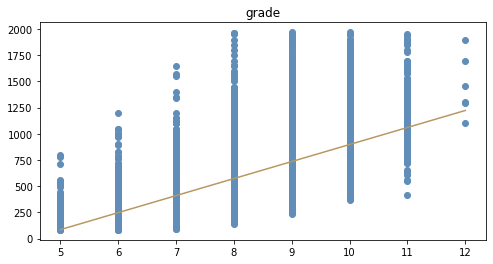

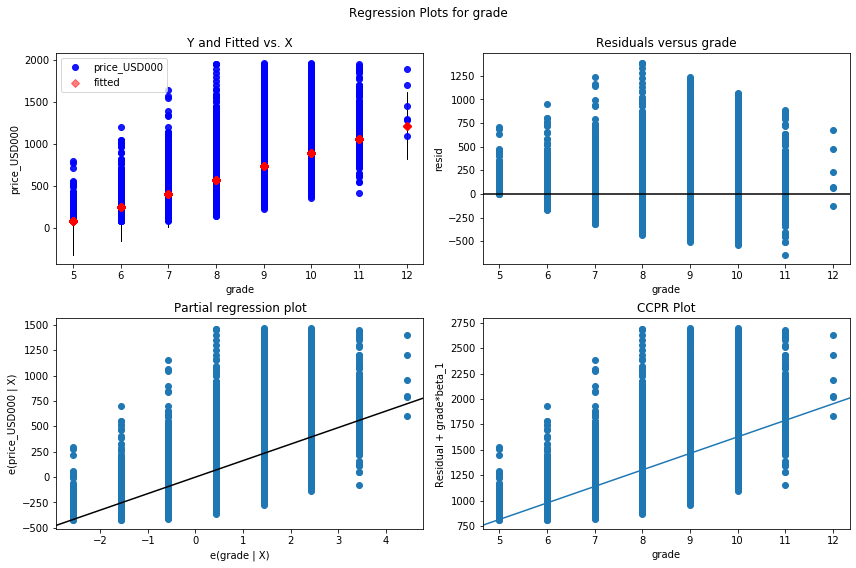

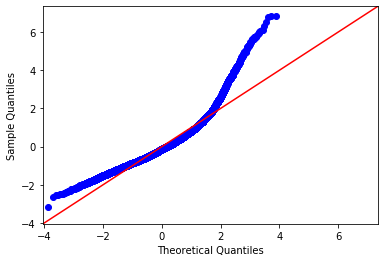

In [135]:
#also running some 1d data visualization for the grade variable's model
linear_regr_analysis_charts('grade', 'price_USD000', data_filtered, res)

The price ~ grade model does not fulfill a number of assumptions of the linear regression model. The residuals are not of a normal distribution, and the distribution of the two variables is not homoscedastic. 

### Step 3 - Multiple Independent Variables

In Question 5, we came up a list of variables that are highly correlated with each other, and decided to pick one of them to use in the linear regression. These columns are: 

{bathrooms, sqft_living, sqft_lot, grade, sqft_above, sqft_living15, sqft_lot15}

Out of these, grade seemed to explain most of the price's variance, so we are keeping that, and dropping the other 6 from the model calibration for now, noting that sqft_living also had a relatively high R-squared on its own, not that much lower than grade. 

Regarding the other variables, we are only keeping the ones that produce at least a 5% R-squared on their own, so we are limiting our model to these variables in the next step: 

{grade, lat, view, bedrooms, floors, sqft_basement}

In [136]:
def run_lin_regr(dependent_variable, independent_variables, data, show_residual_charts = False):
    
    """
    Runs the OLS linear regression on given data and variables, prints summary. 
    If show_residual_charts are turned on, also prints out residual charts. 
    """
    
    y = data[dependent_variable]
    X = data[independent_variables].assign(constant=1)

    res = sm.OLS(y, X).fit()
    print(res.summary())
    
    if show_residual_charts: 
        
        for indep_var in independent_variables: 
    
            sm.graphics.plot_regress_exog(res, indep_var, fig = plt.figure(figsize = (12,8)))
            plt.show()

        residuals = res.resid
        sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
        plt.show()

#### Model A
Every pre-selected variable is put in the model. 

In [137]:
run_lin_regr('price_USD000', [
    'grade', 'lat', 'view', 'bedrooms', 'floors', 'sqft_basement'
], data_filtered)

                            OLS Regression Results                            
Dep. Variable:           price_USD000   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.588
Method:                 Least Squares   F-statistic:                     4766.
Date:                Tue, 21 Jan 2020   Prob (F-statistic):               0.00
Time:                        14:50:05   Log-Likelihood:            -1.3130e+05
No. Observations:               20031   AIC:                         2.626e+05
Df Residuals:                   20024   BIC:                         2.627e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
grade           130.8637      1.405     93.123

Residuals are not normal, there is strong multicollinearity, and we know that at least the grade is heteroscedastic. 

#### Model B
Same variables as Model A, but we are re-coding the variables. 

grade: stays as it is for now
lat: we already have the distance from lat 47.62 variable, going to use that
view, bedrooms, floors: needs further analysis, going to check the independent model's scatter plot. 
sqft_basement: recoded to 0: no basement, 1: there is basement

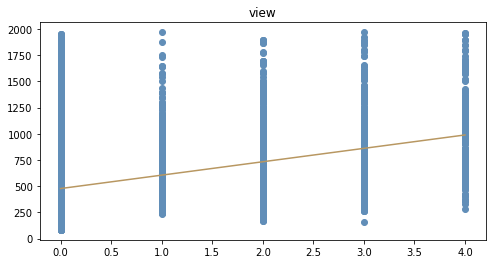

0.0    18358
2.0      797
3.0      383
1.0      291
4.0      202
Name: view, dtype: int64
view
0.0     476.497842
1.0     718.025526
2.0     703.486445
3.0     835.220470
4.0    1043.330866
Name: price_USD000, dtype: float64


In [138]:
linear_regr_analysis_charts('view', 'price_USD000', data_filtered, False)
print(data_filtered['view'].value_counts())
print(data_filtered.groupby(data['view'])['price_USD000'].mean())

dummy recoding: view > 0 -> 1

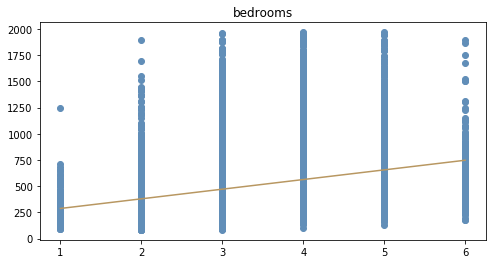

3    9351
4    6315
2    2643
5    1350
6     201
1     171
Name: bedrooms, dtype: int64
bedrooms
1    323.765404
2    399.410745
3    452.836894
4    584.581374
5    651.801389
6    650.578378
Name: price_USD000, dtype: float64


In [139]:
linear_regr_analysis_charts('bedrooms', 'price_USD000', data_filtered, False)
print(data_filtered['bedrooms'].value_counts())
print(data_filtered.groupby(data['bedrooms'])['price_USD000'].mean())

bedroom dummy: bedroom > 3 -> 1

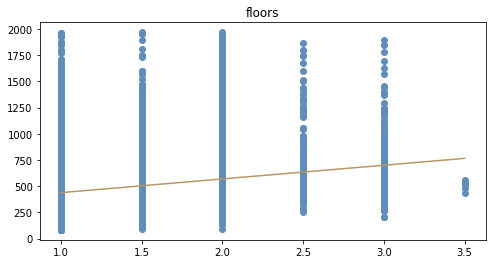

1.0    10076
2.0     7455
1.5     1778
3.0      590
2.5      126
3.5        6
Name: floors, dtype: int64
floors
1.0    425.907541
1.5    545.815614
2.0    585.026124
2.5    804.744968
3.0    542.491732
3.5    511.916667
Name: price_USD000, dtype: float64


In [140]:
linear_regr_analysis_charts('floors', 'price_USD000', data_filtered, False)
print(data_filtered['floors'].value_counts())
print(data_filtered.groupby(data['floors'])['price_USD000'].mean())

This variable is not linear, does not seem to be explaining a lot, dropping it from the analysis. 

In [141]:
# creating new columns now
data_filtered['basement'] = (data_filtered['sqft_basement'] > 0).astype(int)

In [142]:
data_filtered['viewed'] = (data_filtered['view'] > 0).astype(int)

In [143]:
data_filtered['more_than_3_bedrooms'] = (data_filtered['bedrooms'] > 3).astype(int)

In [144]:
data_filtered['lat_dist_from_4762'] = np.abs(data_filtered['lat'] - 47.62)

In [145]:
data_filtered.columns

Index(['id', 'date', 'price_USD000', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'built_after_1975', 'sold_in_2nd_half', 'year_month',
       'seattle_main', 'distance_from_center', 'price_log',
       'distance_from_amazon', 'sqft_lot_log', 'basement', 'viewed',
       'more_than_3_bedrooms', 'lat_dist_from_4762'],
      dtype='object')

In [146]:
# running the model with the new variables

run_lin_regr('price_USD000', [
    'grade', 'lat_dist_from_4762', 'viewed', 'more_than_3_bedrooms', 'basement'
], data_filtered)


                            OLS Regression Results                            
Dep. Variable:           price_USD000   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.636
Method:                 Least Squares   F-statistic:                     7010.
Date:                Tue, 21 Jan 2020   Prob (F-statistic):               0.00
Time:                        14:50:07   Log-Likelihood:            -1.3006e+05
No. Observations:               20031   AIC:                         2.601e+05
Df Residuals:                   20025   BIC:                         2.602e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
grade                  127.1286 

The new variables increased the adj R-squared of the model. 

#### Model C
Adding logarithmic scale, checking if sqft_living is a better contributor than grade. 

In [147]:
data_filtered['price_USD000_log'] = np.log(data_filtered['price_USD000'])

In [148]:
data_filtered['sqft_living_log'] = np.log(data_filtered['sqft_living'])

In [149]:
run_lin_regr('price_USD000', [
    'sqft_living', 'lat_dist_from_4762', 'viewed', 'more_than_3_bedrooms', 'basement'
], data_filtered)

                            OLS Regression Results                            
Dep. Variable:           price_USD000   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.655
Method:                 Least Squares   F-statistic:                     7595.
Date:                Tue, 21 Jan 2020   Prob (F-statistic):               0.00
Time:                        14:50:07   Log-Likelihood:            -1.2954e+05
No. Observations:               20031   AIC:                         2.591e+05
Df Residuals:                   20025   BIC:                         2.591e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
sqft_living              0.2091 

sqft_living is actually a better indicator than grade was in the whole model. Disadvantage is that the coefficients are not logical (negative for bedrooms and basement). 

In [150]:
run_lin_regr('price_USD000_log', [
    'grade', 'lat_dist_from_4762', 'viewed', 'more_than_3_bedrooms', 'basement'
], data_filtered)

                            OLS Regression Results                            
Dep. Variable:       price_USD000_log   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     9678.
Date:                Tue, 21 Jan 2020   Prob (F-statistic):               0.00
Time:                        14:50:07   Log-Likelihood:                -1563.5
No. Observations:               20031   AIC:                             3139.
Df Residuals:                   20025   BIC:                             3186.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
grade                    0.2306 

In [151]:
run_lin_regr('price_USD000_log', [
    'sqft_living', 'lat_dist_from_4762', 'viewed', 'more_than_3_bedrooms', 'basement'
], data_filtered)

                            OLS Regression Results                            
Dep. Variable:       price_USD000_log   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                 1.039e+04
Date:                Tue, 21 Jan 2020   Prob (F-statistic):               0.00
Time:                        14:50:07   Log-Likelihood:                -1051.7
No. Observations:               20031   AIC:                             2115.
Df Residuals:                   20025   BIC:                             2163.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
sqft_living              0.0004 

In [152]:
run_lin_regr('price_USD000_log', [
    'sqft_living_log', 'lat_dist_from_4762', 'viewed', 'basement'
], data_filtered)

                            OLS Regression Results                            
Dep. Variable:       price_USD000_log   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                 1.304e+04
Date:                Tue, 21 Jan 2020   Prob (F-statistic):               0.00
Time:                        14:50:07   Log-Likelihood:                -1025.0
No. Observations:               20031   AIC:                             2060.
Df Residuals:                   20026   BIC:                             2099.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
sqft_living_log        0.7054      0

                            OLS Regression Results                            
Dep. Variable:       price_USD000_log   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                 1.720e+04
Date:                Tue, 21 Jan 2020   Prob (F-statistic):               0.00
Time:                        14:50:07   Log-Likelihood:                -1102.7
No. Observations:               20031   AIC:                             2213.
Df Residuals:                   20027   BIC:                             2245.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
sqft_living_log        0.6939      0

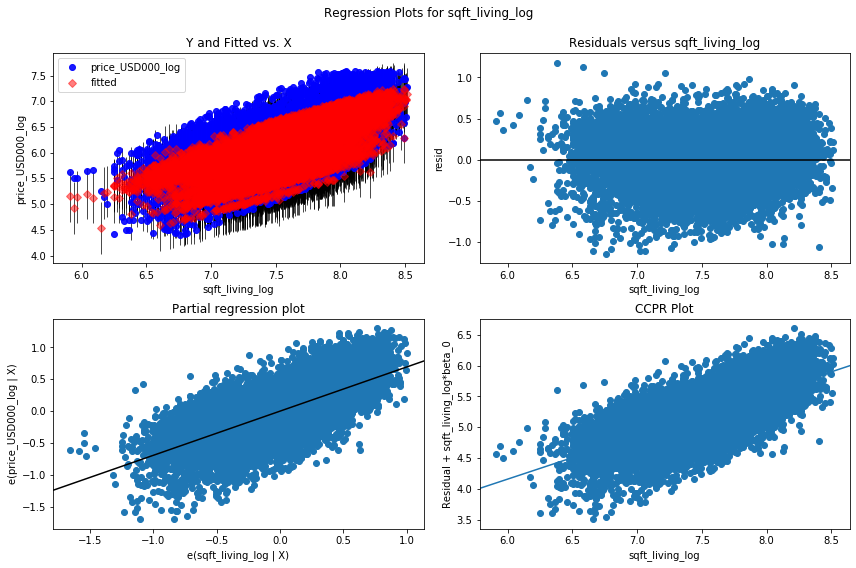

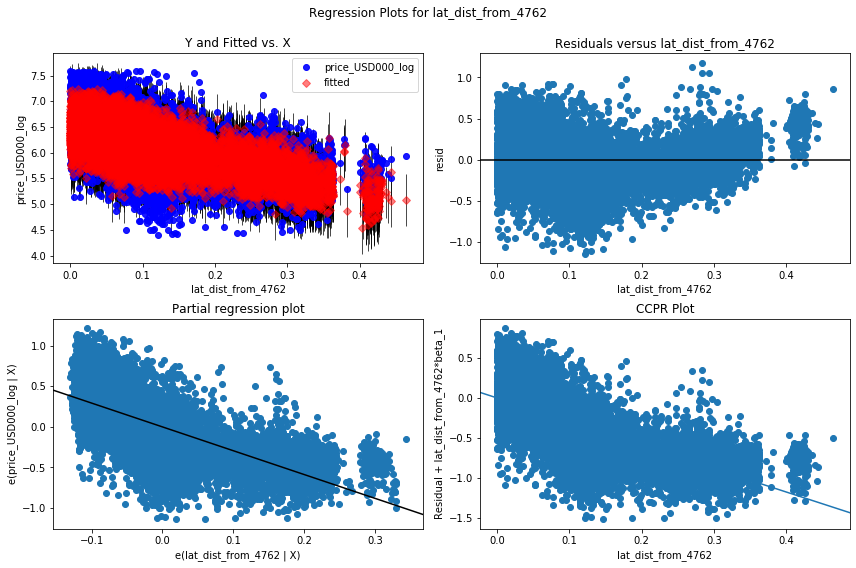

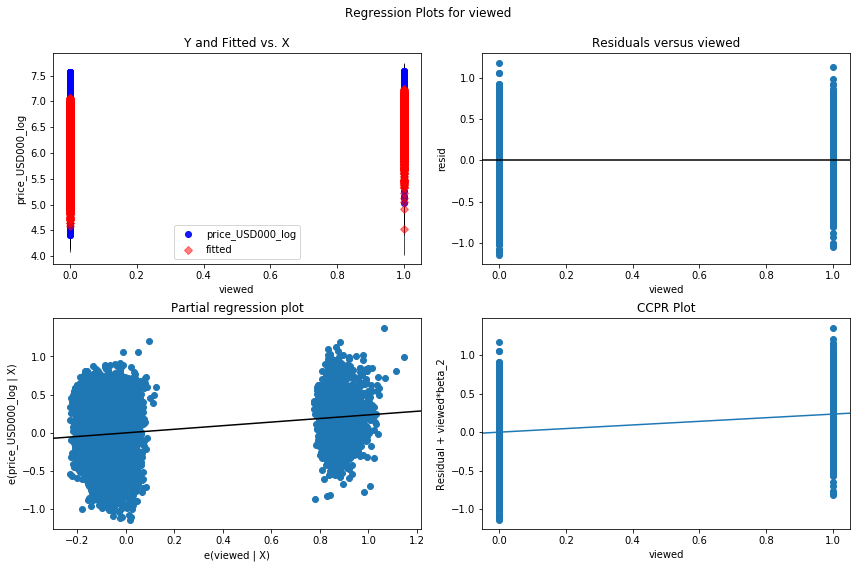

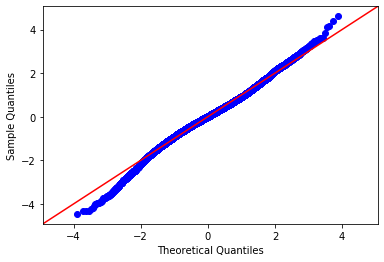

In [153]:
run_lin_regr('price_USD000_log', [
    'sqft_living_log', 'lat_dist_from_4762', 'viewed'
], data_filtered, True )

The model is working from a technical point of view, but are not entirely sure what 'view' variable covers. Running the same model without 'view' variable. 

                            OLS Regression Results                            
Dep. Variable:       price_USD000_log   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                 2.371e+04
Date:                Tue, 21 Jan 2020   Prob (F-statistic):               0.00
Time:                        14:50:14   Log-Likelihood:                -1708.0
No. Observations:               20031   AIC:                             3422.
Df Residuals:                   20028   BIC:                             3446.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
sqft_living_log        0.7246      0

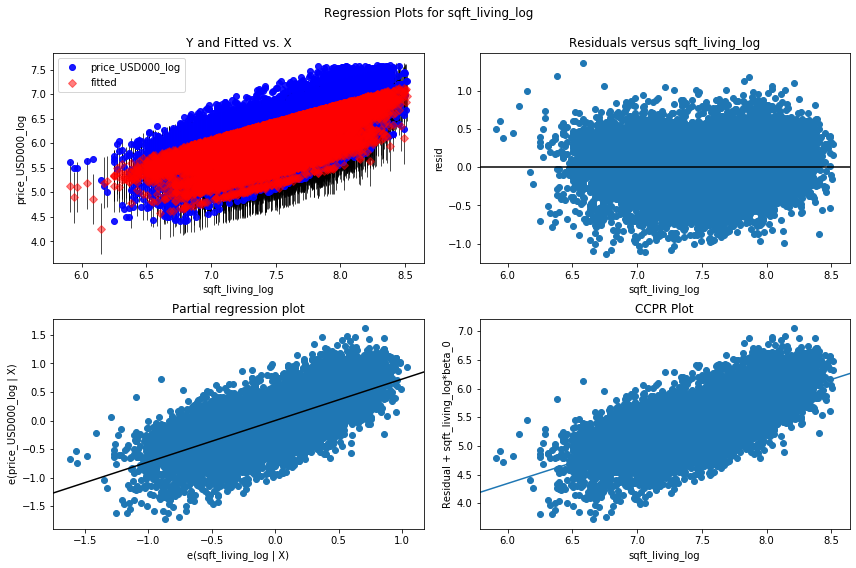

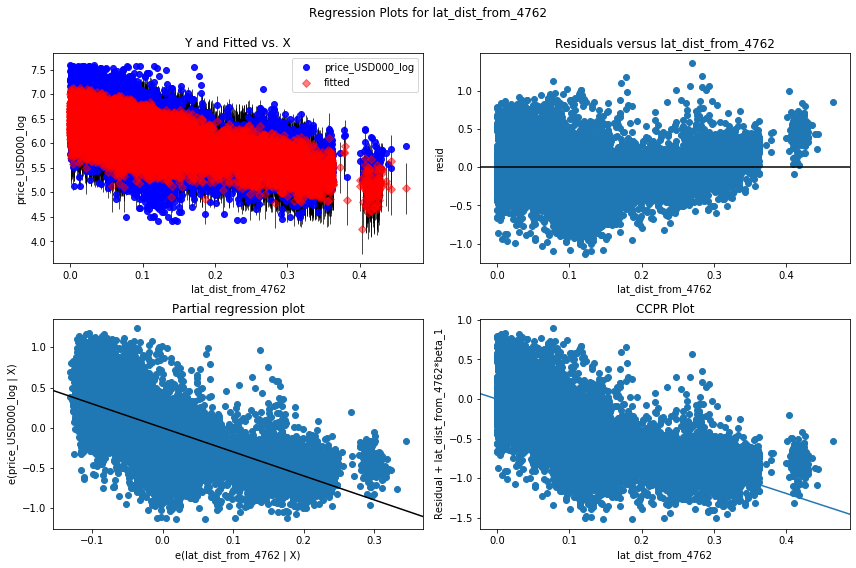

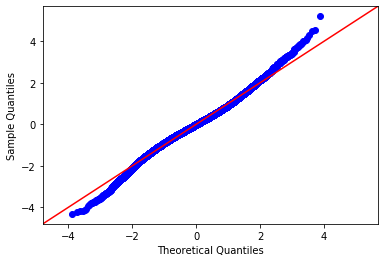

In [154]:
run_lin_regr('price_USD000_log', [
    'sqft_living_log', 'lat_dist_from_4762'
], data_filtered, True )

### Section 3 Result
This is the model we are sticking with:

__price_USD000_log = 0.7246 * sqft_living_log - 2.9815 * lat_dist_from_4762 + 1.0085__

For the following reasons: 
- adjusted r-squared is moderate, but does not reflect a poor model quality. 
- it has only two independent variables;
- there is no significant multicollinearity;
- the coefficient of the variables is meaningful;
- the residuals are not normal, but at least they are not symmetrically not normal, plus Jarque - Bera test is not extreme high. 

#### Model D - Running the chosen variables for subsets of the data

One dummy variable that showed a difference in the database was the built_after_1975. When we analyzed the distances, one of the subgroups showed a more clear pattern. 

In [155]:
run_lin_regr('price_USD000_log', [
    'sqft_living_log', 'lat_dist_from_4762'
], data_filtered[data_filtered['built_after_1975']== True])

                            OLS Regression Results                            
Dep. Variable:       price_USD000_log   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                 1.617e+04
Date:                Tue, 21 Jan 2020   Prob (F-statistic):               0.00
Time:                        14:50:19   Log-Likelihood:                 1171.7
No. Observations:                9651   AIC:                            -2337.
Df Residuals:                    9648   BIC:                            -2316.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
sqft_living_log        0.7847      0

In [156]:
run_lin_regr('price_USD000_log', [
    'sqft_living_log', 'lat_dist_from_4762'
], data_filtered[data_filtered['built_after_1975']== False])

                            OLS Regression Results                            
Dep. Variable:       price_USD000_log   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                 1.015e+04
Date:                Tue, 21 Jan 2020   Prob (F-statistic):               0.00
Time:                        14:50:19   Log-Likelihood:                -2119.1
No. Observations:               10380   AIC:                             4244.
Df Residuals:                   10377   BIC:                             4266.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
sqft_living_log        0.6858      0

For the houses built after 1975, the same variables result in a model with an adjusted R-squared of 0.77, which indicates a better fit than our overall data. 

### Section 3 Appendix

For the majoritoy of my models, R-squared was equal to adjusted R-squared, wanted to check on this. 

In [157]:
r_sq = 0.685
n = 10380
k = 3

adj_r_sq = (1 - (1-r_sq)) * ((n-1)/(n-(k+1)))

adj_r_sq

0.6851980531996917

The reason why r-squared is same as adj r-squared is because the sample size is very large, and we are using a few variables. 